In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from neuraldistributions.models import transforms
from neuraldistributions.datasets import static

from multiprocessing import Pool

import os
device = "cuda"

dataport not available, will only be able to load data locally


In [2]:
import numpy as np
import torch

from neuraldistributions.datasets import mouse_static_loaders, extract_data_key
from neuraldistributions.models import poisson, zig, flowfa, ziffa
from neuraldistributions.trainers import base_trainer
from neuraldistributions.utility import get_loglikelihood

In [3]:
random_seed= 235
dataset_dir = "../project/data"
datasets = [
    "static_edited_dsampled.zip",
]
scan_id = [2, 1]
dataset_paths = [f"{dataset_dir}/{dataset}" for dataset in datasets]
areas = [["V1", "LM"]]
neurons_ns = [1000, 907]

In [4]:
dataset_index = 0
dataset_path = dataset_paths[dataset_index]
data_key = extract_data_key(dataset_path)
area = areas[dataset_index]
neurons_n = neurons_ns[dataset_index]

dataset_config = {
    "paths": [dataset_path],
    "seed": random_seed,
    "batch_size": 64,
    "area": area,
    "neurons_n": neurons_n,
    "normalize_images": True,
    "normalize_neurons": True,
    "return_more": True,
    "device": device,
    "shuffle_train": True,
}

dataloaders = mouse_static_loaders(**dataset_config)

100%|██████████| 5994/5994 [00:00<00:00, 287535.41it/s]


In [5]:
grid_mean_pred_config = {
    "type": "cortex",
    "input_dimensions": 2,
    "hidden_layers": 4,
    "hidden_features": 20,
    "nonlinearity": "ReLU",
    "final_tanh": True,
}

image_model_config = {
    "pad_input": False,
    "stack": -1,
    "layers": 4,
    "input_kern": 15,
    "gamma_input": 1,
    "gamma_readout": 2.439,
    "hidden_dilation": 1,
    "hidden_kern": 13,
    "hidden_channels": 64,
    "n_se_blocks": 0,
    "depth_separable": True,
    "share_features": False,
    "share_grid": False,
    "init_sigma": 0.4,
    "init_mu_range": 0.55,
    "gauss_type": "full",
    "grid_mean_predictor": grid_mean_pred_config,
}

In [6]:
import time
losses = []
times = []
ks = [5, 10, 50, 100, 200, 500]

# load model for different ks and set seed and take time
# train model and compare loss and training time
for k in ks:
    model_name = "flowfa"
    d_latent = 3
    sample_transform = f"learned-leaky-low-rank-k-{k}"
    mean_transform = "learned"
    per_neuron_transform = True
    unit_variance_constraint = False
    
    model_config = {
        "image_model_fn": "nnsysident.models.models.se2d_fullgaussian2d",
        "image_model_config": image_model_config,
        "d_latent": d_latent,
        "sample_transform": sample_transform,
        "mean_transform": mean_transform,
        "per_neuron_samples_transform": per_neuron_transform,
        "init_psi_diag_coef": 0.1,
        "init_C_coef": 0.1,
        "unit_variance_constraint": unit_variance_constraint,
    }
    model = flowfa(dataloaders, random_seed, **model_config)
    
    trainer_config = {
        "epochs": 500,
        "device": "cuda",
        "lr": 0.005,
        "use_avg_loss": True
    }
    out = None
    ## The following line would train the model (upon availability of the dataset)
    start_time = time.time()
    out = base_trainer(model, dataloaders, random_seed, **trainer_config)
    times.append(time.time() - start_time)
    losses.append(out[0])

Score improved (nan --> 5402.151367).


100%|██████████| 70/70 [00:04<00:00, 14.51it/s]


Epoch 1/500 | train loss: 4470.787109 | val loss: 5343.069336
Score improved (5402.151367 --> 5343.069336).


100%|██████████| 70/70 [00:04<00:00, 14.55it/s]


Epoch 2/500 | train loss: 4946.989746 | val loss: 5339.590820
Score improved (5343.069336 --> 5339.590820).


100%|██████████| 70/70 [00:04<00:00, 14.49it/s]


Epoch 3/500 | train loss: 4280.344727 | val loss: 5331.506836
Score improved (5339.590820 --> 5331.506836).


100%|██████████| 70/70 [00:04<00:00, 14.52it/s]


Epoch 4/500 | train loss: 5237.897461 | val loss: 5324.829102
Score improved (5331.506836 --> 5324.829102).


100%|██████████| 70/70 [00:04<00:00, 14.49it/s]


Epoch 5/500 | train loss: 4139.705566 | val loss: 5321.119629
Score improved (5324.829102 --> 5321.119629).


100%|██████████| 70/70 [00:04<00:00, 14.48it/s]


Epoch 6/500 | train loss: 4482.157227 | val loss: 5316.931641
Score improved (5321.119629 --> 5316.931641).


100%|██████████| 70/70 [00:04<00:00, 14.55it/s]


Epoch 7/500 | train loss: 5339.544434 | val loss: 5299.614258
Score improved (5316.931641 --> 5299.614258).


100%|██████████| 70/70 [00:04<00:00, 14.49it/s]


Epoch 8/500 | train loss: 4429.119629 | val loss: 5293.665039
Score improved (5299.614258 --> 5293.665039).


100%|██████████| 70/70 [00:04<00:00, 14.44it/s]


Epoch 9/500 | train loss: 5708.599121 | val loss: 5269.626953
Score improved (5293.665039 --> 5269.626953).


100%|██████████| 70/70 [00:04<00:00, 14.54it/s]


Epoch 10/500 | train loss: 4375.394043 | val loss: 5261.409668
Score improved (5269.626953 --> 5261.409668).


100%|██████████| 70/70 [00:04<00:00, 14.49it/s]


Epoch 11/500 | train loss: 4885.121094 | val loss: 5250.854004
Score improved (5261.409668 --> 5250.854004).


100%|██████████| 70/70 [00:04<00:00, 14.48it/s]


Epoch 12/500 | train loss: 4944.007324 | val loss: 5252.436523
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.51it/s]


Epoch 13/500 | train loss: 4569.388184 | val loss: 5244.240234
Score improved (5250.854004 --> 5244.240234).


100%|██████████| 70/70 [00:04<00:00, 14.64it/s]


Epoch 14/500 | train loss: 4624.879883 | val loss: 5242.058105
Score improved (5244.240234 --> 5242.058105).


100%|██████████| 70/70 [00:04<00:00, 14.54it/s]


Epoch 15/500 | train loss: 4901.978516 | val loss: 5238.088867
Score improved (5242.058105 --> 5238.088867).


100%|██████████| 70/70 [00:04<00:00, 14.50it/s]


Epoch 16/500 | train loss: 4855.829590 | val loss: 5218.981445
Score improved (5238.088867 --> 5218.981445).


100%|██████████| 70/70 [00:04<00:00, 14.40it/s]


Epoch 17/500 | train loss: 4797.570801 | val loss: 5215.684570
Score improved (5218.981445 --> 5215.684570).


100%|██████████| 70/70 [00:04<00:00, 14.48it/s]


Epoch 18/500 | train loss: 4477.041992 | val loss: 5230.736328
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.57it/s]


Epoch 19/500 | train loss: 5059.839844 | val loss: 5217.306641
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.53it/s]


Epoch 20/500 | train loss: 4750.407227 | val loss: 5217.438965
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.50it/s]


Epoch 21/500 | train loss: 4803.657715 | val loss: 5210.718750
Score improved (5215.684570 --> 5210.718750).


100%|██████████| 70/70 [00:04<00:00, 14.60it/s]


Epoch 22/500 | train loss: 5089.267578 | val loss: 5214.476562
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.41it/s]


Epoch 23/500 | train loss: 4790.486816 | val loss: 5198.827637
Score improved (5210.718750 --> 5198.827637).


100%|██████████| 70/70 [00:04<00:00, 14.62it/s]


Epoch 24/500 | train loss: 5540.926758 | val loss: 5195.759766
Score improved (5198.827637 --> 5195.759766).


100%|██████████| 70/70 [00:04<00:00, 14.44it/s]


Epoch 25/500 | train loss: 4319.527832 | val loss: 5194.342773
Score improved (5195.759766 --> 5194.342773).


100%|██████████| 70/70 [00:04<00:00, 14.63it/s]


Epoch 26/500 | train loss: 4926.260742 | val loss: 5190.276367
Score improved (5194.342773 --> 5190.276367).


100%|██████████| 70/70 [00:04<00:00, 14.53it/s]


Epoch 27/500 | train loss: 5550.852051 | val loss: 5177.234375
Score improved (5190.276367 --> 5177.234375).


100%|██████████| 70/70 [00:04<00:00, 14.59it/s]


Epoch 28/500 | train loss: 4457.521973 | val loss: 5180.873047
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.44it/s]


Epoch 29/500 | train loss: 4541.839844 | val loss: 5189.437500
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.50it/s]


Epoch 30/500 | train loss: 4614.496582 | val loss: 5184.637695
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.54it/s]


Epoch 31/500 | train loss: 4647.736816 | val loss: 5175.422363
Score improved (5177.234375 --> 5175.422363).


100%|██████████| 70/70 [00:04<00:00, 14.65it/s]


Epoch 32/500 | train loss: 4686.043945 | val loss: 5166.341309
Score improved (5175.422363 --> 5166.341309).


100%|██████████| 70/70 [00:04<00:00, 14.44it/s]


Epoch 33/500 | train loss: 4327.180176 | val loss: 5173.074219
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.51it/s]


Epoch 34/500 | train loss: 4769.773438 | val loss: 5161.784180
Score improved (5166.341309 --> 5161.784180).


100%|██████████| 70/70 [00:04<00:00, 14.61it/s]


Epoch 35/500 | train loss: 5811.916016 | val loss: 5199.824219
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.48it/s]


Epoch 36/500 | train loss: 4862.324219 | val loss: 5177.058594
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.52it/s]


Epoch 37/500 | train loss: 4724.271484 | val loss: 5176.342773
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.55it/s]


Epoch 38/500 | train loss: 4538.073242 | val loss: 5179.638672
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.53it/s]


Epoch 39/500 | train loss: 5733.249512 | val loss: 5209.879395
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.63it/s]


Epoch 40/500 | train loss: 4704.186523 | val loss: 5192.271973
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.59it/s]


Epoch 41/500 | train loss: 5396.893555 | val loss: 5176.819824
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.65it/s]


Epoch 42/500 | train loss: 5414.770996 | val loss: 5191.690918
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.45it/s]


Epoch 43/500 | train loss: 4457.527832 | val loss: 5163.782227
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.49it/s]


Epoch 44/500 | train loss: 4224.573730 | val loss: 5182.440918
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.59it/s]


Epoch 45/500 | train loss: 4595.219727 | val loss: 5188.280273
EarlyStopping counter: 11 out of 20
Epoch    45: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..
Applying changes..


100%|██████████| 70/70 [00:04<00:00, 14.20it/s]


Epoch 46/500 | train loss: 4846.379883 | val loss: 4121.664551
Score improved (5161.784180 --> 4121.664551).
Retrieve best model..


100%|██████████| 70/70 [00:04<00:00, 14.32it/s]


Epoch 47/500 | train loss: 3899.963623 | val loss: 3539.660400
Score improved (4121.664551 --> 3539.660400).


100%|██████████| 70/70 [00:04<00:00, 14.09it/s]


Epoch 48/500 | train loss: 3234.699951 | val loss: 3142.887695
Score improved (3539.660400 --> 3142.887695).


100%|██████████| 70/70 [00:04<00:00, 14.26it/s]


Epoch 49/500 | train loss: 3155.569092 | val loss: 2844.880615
Score improved (3142.887695 --> 2844.880615).


100%|██████████| 70/70 [00:04<00:00, 14.30it/s]


Epoch 50/500 | train loss: 2500.429199 | val loss: 2619.426758
Score improved (2844.880615 --> 2619.426758).


100%|██████████| 70/70 [00:04<00:00, 14.18it/s]


Epoch 51/500 | train loss: 2770.466553 | val loss: 2452.467529
Score improved (2619.426758 --> 2452.467529).


100%|██████████| 70/70 [00:04<00:00, 14.16it/s]


Epoch 52/500 | train loss: 2706.307617 | val loss: 2320.959961
Score improved (2452.467529 --> 2320.959961).


100%|██████████| 70/70 [00:04<00:00, 14.23it/s]


Epoch 53/500 | train loss: 2186.579346 | val loss: 2221.089111
Score improved (2320.959961 --> 2221.089111).


100%|██████████| 70/70 [00:04<00:00, 14.22it/s]


Epoch 54/500 | train loss: 2245.317139 | val loss: 2140.095215
Score improved (2221.089111 --> 2140.095215).


100%|██████████| 70/70 [00:04<00:00, 14.25it/s]


Epoch 55/500 | train loss: 2020.542603 | val loss: 2070.589111
Score improved (2140.095215 --> 2070.589111).


100%|██████████| 70/70 [00:04<00:00, 14.36it/s]


Epoch 56/500 | train loss: 2051.277588 | val loss: 2020.574707
Score improved (2070.589111 --> 2020.574707).


100%|██████████| 70/70 [00:04<00:00, 14.27it/s]


Epoch 57/500 | train loss: 2123.347900 | val loss: 1976.452515
Score improved (2020.574707 --> 1976.452515).


100%|██████████| 70/70 [00:04<00:00, 14.28it/s]


Epoch 58/500 | train loss: 1986.561279 | val loss: 1946.433228
Score improved (1976.452515 --> 1946.433228).


100%|██████████| 70/70 [00:04<00:00, 14.31it/s]


Epoch 59/500 | train loss: 2024.418823 | val loss: 1917.342041
Score improved (1946.433228 --> 1917.342041).


100%|██████████| 70/70 [00:04<00:00, 14.27it/s]


Epoch 60/500 | train loss: 2018.220337 | val loss: 1893.807007
Score improved (1917.342041 --> 1893.807007).


100%|██████████| 70/70 [00:04<00:00, 14.26it/s]


Epoch 61/500 | train loss: 1955.509277 | val loss: 1877.326782
Score improved (1893.807007 --> 1877.326782).


100%|██████████| 70/70 [00:04<00:00, 14.36it/s]


Epoch 62/500 | train loss: 1903.152100 | val loss: 1860.375000
Score improved (1877.326782 --> 1860.375000).


100%|██████████| 70/70 [00:04<00:00, 14.20it/s]


Epoch 63/500 | train loss: 1857.605469 | val loss: 1845.760254
Score improved (1860.375000 --> 1845.760254).


100%|██████████| 70/70 [00:04<00:00, 14.17it/s]


Epoch 64/500 | train loss: 2014.157715 | val loss: 1839.568848
Score improved (1845.760254 --> 1839.568848).


100%|██████████| 70/70 [00:04<00:00, 14.31it/s]


Epoch 65/500 | train loss: 1914.721191 | val loss: 1830.593750
Score improved (1839.568848 --> 1830.593750).


100%|██████████| 70/70 [00:04<00:00, 14.33it/s]


Epoch 66/500 | train loss: 1659.970459 | val loss: 1821.909668
Score improved (1830.593750 --> 1821.909668).


100%|██████████| 70/70 [00:04<00:00, 14.31it/s]


Epoch 67/500 | train loss: 1807.858887 | val loss: 1812.432129
Score improved (1821.909668 --> 1812.432129).


100%|██████████| 70/70 [00:04<00:00, 14.26it/s]


Epoch 68/500 | train loss: 1730.207031 | val loss: 1808.105957
Score improved (1812.432129 --> 1808.105957).


100%|██████████| 70/70 [00:04<00:00, 14.26it/s]


Epoch 69/500 | train loss: 1867.469849 | val loss: 1804.065918
Score improved (1808.105957 --> 1804.065918).


100%|██████████| 70/70 [00:04<00:00, 14.29it/s]


Epoch 70/500 | train loss: 1860.643555 | val loss: 1802.208984
Score improved (1804.065918 --> 1802.208984).


100%|██████████| 70/70 [00:04<00:00, 14.24it/s]


Epoch 71/500 | train loss: 1869.205688 | val loss: 1797.783203
Score improved (1802.208984 --> 1797.783203).


100%|██████████| 70/70 [00:04<00:00, 14.31it/s]


Epoch 72/500 | train loss: 1824.251465 | val loss: 1792.064697
Score improved (1797.783203 --> 1792.064697).


100%|██████████| 70/70 [00:04<00:00, 14.26it/s]


Epoch 73/500 | train loss: 1821.864502 | val loss: 1793.849365
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.35it/s]


Epoch 74/500 | train loss: 1785.272583 | val loss: 1792.318359
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.33it/s]


Epoch 75/500 | train loss: 1918.102905 | val loss: 1790.756836
Score improved (1792.064697 --> 1790.756836).


100%|██████████| 70/70 [00:04<00:00, 14.29it/s]


Epoch 76/500 | train loss: 1831.167603 | val loss: 1791.459961
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.31it/s]


Epoch 77/500 | train loss: 1815.890137 | val loss: 1785.355957
Score improved (1790.756836 --> 1785.355957).


100%|██████████| 70/70 [00:04<00:00, 14.29it/s]


Epoch 78/500 | train loss: 1833.334473 | val loss: 1784.425049
Score improved (1785.355957 --> 1784.425049).


100%|██████████| 70/70 [00:04<00:00, 14.38it/s]


Epoch 79/500 | train loss: 1773.892334 | val loss: 1789.663696
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.29it/s]


Epoch 80/500 | train loss: 1801.963623 | val loss: 1788.583008
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.29it/s]


Epoch 81/500 | train loss: 1844.494385 | val loss: 1788.727295
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.29it/s]


Epoch 82/500 | train loss: 1775.908569 | val loss: 1785.769775
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.38it/s]


Epoch 83/500 | train loss: 1911.959717 | val loss: 1785.242432
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.31it/s]


Epoch 84/500 | train loss: 1882.791016 | val loss: 1788.875732
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.29it/s]


Epoch 85/500 | train loss: 1921.264648 | val loss: 1787.692871
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.33it/s]


Epoch 86/500 | train loss: 1846.541138 | val loss: 1784.185303
Score improved (1784.425049 --> 1784.185303).


100%|██████████| 70/70 [00:04<00:00, 14.27it/s]


Epoch 87/500 | train loss: 1837.221924 | val loss: 1784.936768
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.32it/s]


Epoch 88/500 | train loss: 1833.092896 | val loss: 1787.900635
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.29it/s]


Epoch 89/500 | train loss: 1822.984009 | val loss: 1789.737549
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.30it/s]


Epoch 90/500 | train loss: 1779.491333 | val loss: 1791.671387
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.37it/s]


Epoch 91/500 | train loss: 1783.998169 | val loss: 1787.831543
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.30it/s]


Epoch 92/500 | train loss: 1808.410767 | val loss: 1789.260010
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.28it/s]


Epoch 93/500 | train loss: 1905.464722 | val loss: 1789.360474
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.18it/s]


Epoch 94/500 | train loss: 1755.768921 | val loss: 1789.884888
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.27it/s]


Epoch 95/500 | train loss: 1786.108398 | val loss: 1792.974365
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.22it/s]


Epoch 96/500 | train loss: 1817.740234 | val loss: 1792.976807
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.36it/s]


Epoch 97/500 | train loss: 1906.617920 | val loss: 1791.558960
EarlyStopping counter: 11 out of 20
Epoch    97: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..


100%|██████████| 70/70 [00:04<00:00, 14.21it/s]


Epoch 98/500 | train loss: 1898.709229 | val loss: 1780.184326
Score improved (1784.185303 --> 1780.184326).


100%|██████████| 70/70 [00:04<00:00, 14.22it/s]


Epoch 99/500 | train loss: 1675.291504 | val loss: 1781.391724
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.31it/s]


Epoch 100/500 | train loss: 1682.650513 | val loss: 1779.766357
Score improved (1780.184326 --> 1779.766357).


100%|██████████| 70/70 [00:04<00:00, 14.36it/s]


Epoch 101/500 | train loss: 1810.230591 | val loss: 1782.849854
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.27it/s]


Epoch 102/500 | train loss: 1764.914307 | val loss: 1784.717285
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.30it/s]


Epoch 103/500 | train loss: 1766.129639 | val loss: 1787.746582
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.23it/s]


Epoch 104/500 | train loss: 1684.567383 | val loss: 1788.368652
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.30it/s]


Epoch 105/500 | train loss: 1731.389282 | val loss: 1786.530518
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.22it/s]


Epoch 106/500 | train loss: 1715.999023 | val loss: 1789.522705
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.23it/s]


Epoch 107/500 | train loss: 1706.074951 | val loss: 1786.077637
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.28it/s]


Epoch 108/500 | train loss: 1795.743408 | val loss: 1791.839844
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.29it/s]


Epoch 109/500 | train loss: 1748.554565 | val loss: 1791.349243
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.17it/s]


Epoch 110/500 | train loss: 1786.034546 | val loss: 1790.064331
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.18it/s]


Epoch 111/500 | train loss: 1774.336426 | val loss: 1786.479370
EarlyStopping counter: 11 out of 20
Epoch   111: reducing learning rate of group 0 to 4.5000e-04.
Retrieve best model..


100%|██████████| 70/70 [00:04<00:00, 14.22it/s]


Epoch 112/500 | train loss: 1742.210938 | val loss: 1783.203369
EarlyStopping counter: 12 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.10it/s]


Epoch 113/500 | train loss: 1616.525391 | val loss: 1782.470947
EarlyStopping counter: 13 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.21it/s]


Epoch 114/500 | train loss: 1669.050537 | val loss: 1780.074463
EarlyStopping counter: 14 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.12it/s]


Epoch 115/500 | train loss: 1686.736328 | val loss: 1781.397339
EarlyStopping counter: 15 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.06it/s]


Epoch 116/500 | train loss: 1672.414307 | val loss: 1781.071289
EarlyStopping counter: 16 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.08it/s]


Epoch 117/500 | train loss: 1688.554932 | val loss: 1781.915039
EarlyStopping counter: 17 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.27it/s]


Epoch 118/500 | train loss: 1627.312012 | val loss: 1781.046021
EarlyStopping counter: 18 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.21it/s]


Epoch 119/500 | train loss: 1682.329468 | val loss: 1780.046143
EarlyStopping counter: 19 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.37it/s]


Epoch 120/500 | train loss: 1654.319824 | val loss: 1780.147461
EarlyStopping counter: 20 out of 20
Early stopping at epoch 119. Best val loss: 1779.766
Retrieve best model..
Score improved (nan --> 5402.151367).


100%|██████████| 70/70 [00:04<00:00, 14.53it/s]


Epoch 1/500 | train loss: 4470.787109 | val loss: 5343.321777
Score improved (5402.151367 --> 5343.321777).


100%|██████████| 70/70 [00:04<00:00, 14.58it/s]


Epoch 2/500 | train loss: 4946.807617 | val loss: 5339.655762
Score improved (5343.321777 --> 5339.655762).


100%|██████████| 70/70 [00:04<00:00, 14.55it/s]


Epoch 3/500 | train loss: 4279.188477 | val loss: 5331.402344
Score improved (5339.655762 --> 5331.402344).


100%|██████████| 70/70 [00:04<00:00, 14.39it/s]


Epoch 4/500 | train loss: 5235.533691 | val loss: 5324.918945
Score improved (5331.402344 --> 5324.918945).


100%|██████████| 70/70 [00:04<00:00, 14.60it/s]


Epoch 5/500 | train loss: 4139.886230 | val loss: 5320.621582
Score improved (5324.918945 --> 5320.621582).


100%|██████████| 70/70 [00:04<00:00, 14.58it/s]


Epoch 6/500 | train loss: 4481.368652 | val loss: 5317.532227
Score improved (5320.621582 --> 5317.532227).


100%|██████████| 70/70 [00:04<00:00, 14.51it/s]


Epoch 7/500 | train loss: 5341.873047 | val loss: 5303.298828
Score improved (5317.532227 --> 5303.298828).


100%|██████████| 70/70 [00:04<00:00, 14.48it/s]


Epoch 8/500 | train loss: 4420.456543 | val loss: 5298.100586
Score improved (5303.298828 --> 5298.100586).


100%|██████████| 70/70 [00:04<00:00, 14.63it/s]


Epoch 9/500 | train loss: 5710.338379 | val loss: 5278.553711
Score improved (5298.100586 --> 5278.553711).


100%|██████████| 70/70 [00:04<00:00, 14.60it/s]


Epoch 10/500 | train loss: 4366.480469 | val loss: 5276.891113
Score improved (5278.553711 --> 5276.891113).


100%|██████████| 70/70 [00:04<00:00, 14.55it/s]


Epoch 11/500 | train loss: 4885.494629 | val loss: 5263.235352
Score improved (5276.891113 --> 5263.235352).


100%|██████████| 70/70 [00:04<00:00, 14.65it/s]


Epoch 12/500 | train loss: 4935.997070 | val loss: 5252.627930
Score improved (5263.235352 --> 5252.627930).


100%|██████████| 70/70 [00:04<00:00, 14.52it/s]


Epoch 13/500 | train loss: 4566.262695 | val loss: 5251.346680
Score improved (5252.627930 --> 5251.346680).


100%|██████████| 70/70 [00:04<00:00, 14.51it/s]


Epoch 14/500 | train loss: 4610.379883 | val loss: 5238.090332
Score improved (5251.346680 --> 5238.090332).


100%|██████████| 70/70 [00:04<00:00, 14.54it/s]


Epoch 15/500 | train loss: 4895.885742 | val loss: 5241.798828
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.48it/s]


Epoch 16/500 | train loss: 4848.325684 | val loss: 5228.908691
Score improved (5238.090332 --> 5228.908691).


100%|██████████| 70/70 [00:04<00:00, 14.58it/s]


Epoch 17/500 | train loss: 4789.250000 | val loss: 5222.065430
Score improved (5228.908691 --> 5222.065430).


100%|██████████| 70/70 [00:04<00:00, 14.58it/s]


Epoch 18/500 | train loss: 4469.641602 | val loss: 5223.629883
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.58it/s]


Epoch 19/500 | train loss: 5070.698242 | val loss: 5219.592773
Score improved (5222.065430 --> 5219.592773).


100%|██████████| 70/70 [00:04<00:00, 14.59it/s]


Epoch 20/500 | train loss: 4753.680664 | val loss: 5225.045898
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.64it/s]


Epoch 21/500 | train loss: 4803.854980 | val loss: 5216.434570
Score improved (5219.592773 --> 5216.434570).


100%|██████████| 70/70 [00:04<00:00, 14.55it/s]


Epoch 22/500 | train loss: 5078.965332 | val loss: 5202.739746
Score improved (5216.434570 --> 5202.739746).


100%|██████████| 70/70 [00:04<00:00, 14.56it/s]


Epoch 23/500 | train loss: 4786.823242 | val loss: 5198.568359
Score improved (5202.739746 --> 5198.568359).


100%|██████████| 70/70 [00:04<00:00, 14.48it/s]


Epoch 24/500 | train loss: 5542.375488 | val loss: 5185.379883
Score improved (5198.568359 --> 5185.379883).


100%|██████████| 70/70 [00:04<00:00, 14.51it/s]


Epoch 25/500 | train loss: 4328.014648 | val loss: 5193.717285
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.59it/s]


Epoch 26/500 | train loss: 4931.761719 | val loss: 5176.265137
Score improved (5185.379883 --> 5176.265137).


100%|██████████| 70/70 [00:04<00:00, 14.59it/s]


Epoch 27/500 | train loss: 5569.402832 | val loss: 5178.851562
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.63it/s]


Epoch 28/500 | train loss: 4443.800293 | val loss: 5190.100098
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.66it/s]


Epoch 29/500 | train loss: 4557.278809 | val loss: 5177.655762
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.63it/s]


Epoch 30/500 | train loss: 4611.833984 | val loss: 5188.707031
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.61it/s]


Epoch 31/500 | train loss: 4647.123047 | val loss: 5159.417969
Score improved (5176.265137 --> 5159.417969).


100%|██████████| 70/70 [00:04<00:00, 14.50it/s]


Epoch 32/500 | train loss: 4676.851562 | val loss: 5178.810547
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.58it/s]


Epoch 33/500 | train loss: 4311.904785 | val loss: 5168.672852
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.55it/s]


Epoch 34/500 | train loss: 4795.939453 | val loss: 5176.806152
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.52it/s]


Epoch 35/500 | train loss: 5786.321777 | val loss: 5185.101562
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.57it/s]


Epoch 36/500 | train loss: 4857.961426 | val loss: 5163.403320
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.36it/s]


Epoch 37/500 | train loss: 4698.584961 | val loss: 5177.146484
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.47it/s]


Epoch 38/500 | train loss: 4518.385254 | val loss: 5180.541992
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.44it/s]


Epoch 39/500 | train loss: 5731.651855 | val loss: 5192.930664
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.38it/s]


Epoch 40/500 | train loss: 4711.550781 | val loss: 5181.738281
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.48it/s]


Epoch 41/500 | train loss: 5416.982422 | val loss: 5168.125000
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.47it/s]


Epoch 42/500 | train loss: 5456.231445 | val loss: 5177.384766
EarlyStopping counter: 11 out of 20
Epoch    42: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..
Applying changes..


100%|██████████| 70/70 [00:04<00:00, 14.16it/s]


Epoch 43/500 | train loss: 4464.788086 | val loss: 4114.166992
Score improved (5159.417969 --> 4114.166992).
Retrieve best model..


100%|██████████| 70/70 [00:04<00:00, 14.29it/s]


Epoch 44/500 | train loss: 3387.312500 | val loss: 3538.486084
Score improved (4114.166992 --> 3538.486084).


100%|██████████| 70/70 [00:04<00:00, 14.26it/s]


Epoch 45/500 | train loss: 3199.560059 | val loss: 3133.052002
Score improved (3538.486084 --> 3133.052002).


100%|██████████| 70/70 [00:04<00:00, 14.32it/s]


Epoch 46/500 | train loss: 2970.051514 | val loss: 2826.441895
Score improved (3133.052002 --> 2826.441895).


100%|██████████| 70/70 [00:04<00:00, 14.24it/s]


Epoch 47/500 | train loss: 2712.134766 | val loss: 2608.150391
Score improved (2826.441895 --> 2608.150391).


100%|██████████| 70/70 [00:04<00:00, 14.25it/s]


Epoch 48/500 | train loss: 2466.650391 | val loss: 2441.494873
Score improved (2608.150391 --> 2441.494873).


100%|██████████| 70/70 [00:04<00:00, 14.21it/s]


Epoch 49/500 | train loss: 2494.436768 | val loss: 2312.474365
Score improved (2441.494873 --> 2312.474365).


100%|██████████| 70/70 [00:04<00:00, 14.26it/s]


Epoch 50/500 | train loss: 2108.921143 | val loss: 2209.732422
Score improved (2312.474365 --> 2209.732422).


100%|██████████| 70/70 [00:04<00:00, 14.26it/s]


Epoch 51/500 | train loss: 2348.601318 | val loss: 2128.945801
Score improved (2209.732422 --> 2128.945801).


100%|██████████| 70/70 [00:04<00:00, 14.24it/s]


Epoch 52/500 | train loss: 2346.456543 | val loss: 2069.916504
Score improved (2128.945801 --> 2069.916504).


100%|██████████| 70/70 [00:04<00:00, 14.27it/s]


Epoch 53/500 | train loss: 1987.218628 | val loss: 2016.075195
Score improved (2069.916504 --> 2016.075195).


100%|██████████| 70/70 [00:04<00:00, 14.20it/s]


Epoch 54/500 | train loss: 2058.652344 | val loss: 1974.310181
Score improved (2016.075195 --> 1974.310181).


100%|██████████| 70/70 [00:04<00:00, 14.35it/s]


Epoch 55/500 | train loss: 1902.082886 | val loss: 1941.157715
Score improved (1974.310181 --> 1941.157715).


100%|██████████| 70/70 [00:04<00:00, 14.23it/s]


Epoch 56/500 | train loss: 1939.833862 | val loss: 1910.526367
Score improved (1941.157715 --> 1910.526367).


100%|██████████| 70/70 [00:04<00:00, 14.24it/s]


Epoch 57/500 | train loss: 2010.333740 | val loss: 1888.045898
Score improved (1910.526367 --> 1888.045898).


100%|██████████| 70/70 [00:04<00:00, 14.27it/s]


Epoch 58/500 | train loss: 1907.883423 | val loss: 1869.931763
Score improved (1888.045898 --> 1869.931763).


100%|██████████| 70/70 [00:04<00:00, 14.22it/s]


Epoch 59/500 | train loss: 1950.741333 | val loss: 1854.310547
Score improved (1869.931763 --> 1854.310547).


100%|██████████| 70/70 [00:04<00:00, 14.25it/s]


Epoch 60/500 | train loss: 1949.238037 | val loss: 1841.866211
Score improved (1854.310547 --> 1841.866211).


100%|██████████| 70/70 [00:04<00:00, 14.25it/s]


Epoch 61/500 | train loss: 1910.953979 | val loss: 1833.165527
Score improved (1841.866211 --> 1833.165527).


100%|██████████| 70/70 [00:04<00:00, 14.26it/s]


Epoch 62/500 | train loss: 1871.137085 | val loss: 1819.816650
Score improved (1833.165527 --> 1819.816650).


100%|██████████| 70/70 [00:04<00:00, 14.27it/s]


Epoch 63/500 | train loss: 1826.765137 | val loss: 1812.177979
Score improved (1819.816650 --> 1812.177979).


100%|██████████| 70/70 [00:04<00:00, 14.30it/s]


Epoch 64/500 | train loss: 1975.771362 | val loss: 1810.979736
Score improved (1812.177979 --> 1810.979736).


100%|██████████| 70/70 [00:04<00:00, 14.28it/s]


Epoch 65/500 | train loss: 1886.359985 | val loss: 1803.625854
Score improved (1810.979736 --> 1803.625854).


100%|██████████| 70/70 [00:04<00:00, 14.19it/s]


Epoch 66/500 | train loss: 1662.971802 | val loss: 1799.758789
Score improved (1803.625854 --> 1799.758789).


100%|██████████| 70/70 [00:04<00:00, 14.30it/s]


Epoch 67/500 | train loss: 1798.220947 | val loss: 1796.465332
Score improved (1799.758789 --> 1796.465332).


100%|██████████| 70/70 [00:04<00:00, 14.25it/s]


Epoch 68/500 | train loss: 1726.778687 | val loss: 1791.492432
Score improved (1796.465332 --> 1791.492432).


100%|██████████| 70/70 [00:04<00:00, 14.26it/s]


Epoch 69/500 | train loss: 1850.242798 | val loss: 1792.487549
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.34it/s]


Epoch 70/500 | train loss: 1853.659546 | val loss: 1787.102417
Score improved (1791.492432 --> 1787.102417).


100%|██████████| 70/70 [00:04<00:00, 14.23it/s]


Epoch 71/500 | train loss: 1867.153198 | val loss: 1789.078857
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.30it/s]


Epoch 72/500 | train loss: 1818.798950 | val loss: 1784.338501
Score improved (1787.102417 --> 1784.338501).


100%|██████████| 70/70 [00:04<00:00, 14.12it/s]


Epoch 73/500 | train loss: 1816.860718 | val loss: 1784.704346
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.14it/s]


Epoch 74/500 | train loss: 1783.892700 | val loss: 1784.803467
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.27it/s]


Epoch 75/500 | train loss: 1908.290283 | val loss: 1783.277100
Score improved (1784.338501 --> 1783.277100).


100%|██████████| 70/70 [00:04<00:00, 14.45it/s]


Epoch 76/500 | train loss: 1828.447144 | val loss: 1787.389160
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.12it/s]


Epoch 77/500 | train loss: 1809.401367 | val loss: 1783.326538
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.10it/s]


Epoch 78/500 | train loss: 1831.696655 | val loss: 1786.033447
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 79/500 | train loss: 1774.309937 | val loss: 1786.541138
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.16it/s]


Epoch 80/500 | train loss: 1803.899048 | val loss: 1783.692139
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 81/500 | train loss: 1842.501709 | val loss: 1785.503418
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 82/500 | train loss: 1778.087280 | val loss: 1782.764526
Score improved (1783.277100 --> 1782.764526).


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 83/500 | train loss: 1910.964355 | val loss: 1785.337158
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 84/500 | train loss: 1883.641602 | val loss: 1784.620728
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.10it/s]


Epoch 85/500 | train loss: 1914.846924 | val loss: 1783.947754
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 86/500 | train loss: 1843.066895 | val loss: 1783.977295
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 87/500 | train loss: 1835.352295 | val loss: 1789.331665
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 88/500 | train loss: 1832.314819 | val loss: 1786.932983
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 89/500 | train loss: 1815.553711 | val loss: 1787.656128
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 90/500 | train loss: 1769.582153 | val loss: 1791.518066
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 91/500 | train loss: 1780.222412 | val loss: 1786.599609
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 92/500 | train loss: 1802.743042 | val loss: 1787.617920
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.10it/s]


Epoch 93/500 | train loss: 1897.958618 | val loss: 1789.268311
EarlyStopping counter: 11 out of 20
Epoch    93: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 94/500 | train loss: 1757.170654 | val loss: 1781.021362
Score improved (1782.764526 --> 1781.021362).


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 95/500 | train loss: 1705.283325 | val loss: 1781.670166
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.10it/s]


Epoch 96/500 | train loss: 1740.528442 | val loss: 1782.684692
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.15it/s]


Epoch 97/500 | train loss: 1829.299438 | val loss: 1782.765503
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 98/500 | train loss: 1815.379883 | val loss: 1781.791260
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 99/500 | train loss: 1673.309814 | val loss: 1782.474243
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 100/500 | train loss: 1691.691406 | val loss: 1779.994629
Score improved (1781.021362 --> 1779.994629).


100%|██████████| 70/70 [00:04<00:00, 15.12it/s]


Epoch 101/500 | train loss: 1816.168579 | val loss: 1785.959229
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.09it/s]


Epoch 102/500 | train loss: 1767.060791 | val loss: 1785.392090
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.12it/s]


Epoch 103/500 | train loss: 1766.513062 | val loss: 1787.484131
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 104/500 | train loss: 1683.553345 | val loss: 1787.164429
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 105/500 | train loss: 1732.851074 | val loss: 1786.183716
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 106/500 | train loss: 1714.932861 | val loss: 1788.436768
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 107/500 | train loss: 1707.020142 | val loss: 1786.808350
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 108/500 | train loss: 1801.095825 | val loss: 1794.745850
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 109/500 | train loss: 1750.730347 | val loss: 1791.811768
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 110/500 | train loss: 1779.287231 | val loss: 1794.042358
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 111/500 | train loss: 1772.670898 | val loss: 1791.938477
EarlyStopping counter: 11 out of 20
Epoch   111: reducing learning rate of group 0 to 4.5000e-04.
Retrieve best model..


100%|██████████| 70/70 [00:04<00:00, 15.16it/s]


Epoch 112/500 | train loss: 1738.472168 | val loss: 1782.779297
EarlyStopping counter: 12 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.13it/s]


Epoch 113/500 | train loss: 1614.950684 | val loss: 1784.272217
EarlyStopping counter: 13 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.12it/s]


Epoch 114/500 | train loss: 1668.063599 | val loss: 1782.240234
EarlyStopping counter: 14 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.12it/s]


Epoch 115/500 | train loss: 1688.395020 | val loss: 1782.418213
EarlyStopping counter: 15 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.14it/s]


Epoch 116/500 | train loss: 1676.446045 | val loss: 1783.061035
EarlyStopping counter: 16 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 117/500 | train loss: 1685.387695 | val loss: 1783.319336
EarlyStopping counter: 17 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.09it/s]


Epoch 118/500 | train loss: 1630.614502 | val loss: 1783.437500
EarlyStopping counter: 18 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.11it/s]


Epoch 119/500 | train loss: 1685.141479 | val loss: 1782.466553
EarlyStopping counter: 19 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.10it/s]


Epoch 120/500 | train loss: 1656.804321 | val loss: 1783.483643
EarlyStopping counter: 20 out of 20
Early stopping at epoch 119. Best val loss: 1779.995
Retrieve best model..
Score improved (nan --> 5402.151367).


100%|██████████| 70/70 [00:04<00:00, 15.27it/s]


Epoch 1/500 | train loss: 4470.787109 | val loss: 5343.696289
Score improved (5402.151367 --> 5343.696289).


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 2/500 | train loss: 4947.129883 | val loss: 5340.359863
Score improved (5343.696289 --> 5340.359863).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 3/500 | train loss: 4279.952148 | val loss: 5331.937988
Score improved (5340.359863 --> 5331.937988).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 4/500 | train loss: 5237.296875 | val loss: 5330.126465
Score improved (5331.937988 --> 5330.126465).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 5/500 | train loss: 4128.561523 | val loss: 5323.911133
Score improved (5330.126465 --> 5323.911133).


100%|██████████| 70/70 [00:04<00:00, 15.23it/s]


Epoch 6/500 | train loss: 4475.419434 | val loss: 5317.881836
Score improved (5323.911133 --> 5317.881836).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 7/500 | train loss: 5332.096191 | val loss: 5311.101562
Score improved (5317.881836 --> 5311.101562).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 8/500 | train loss: 4412.682617 | val loss: 5304.099609
Score improved (5311.101562 --> 5304.099609).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 9/500 | train loss: 5702.105957 | val loss: 5288.115723
Score improved (5304.099609 --> 5288.115723).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 10/500 | train loss: 4364.496582 | val loss: 5282.416016
Score improved (5288.115723 --> 5282.416016).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 11/500 | train loss: 4875.895996 | val loss: 5263.455078
Score improved (5282.416016 --> 5263.455078).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 12/500 | train loss: 4927.615234 | val loss: 5274.225586
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.23it/s]


Epoch 13/500 | train loss: 4558.755859 | val loss: 5256.076660
Score improved (5263.455078 --> 5256.076660).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 14/500 | train loss: 4609.006348 | val loss: 5252.573730
Score improved (5256.076660 --> 5252.573730).


100%|██████████| 70/70 [00:04<00:00, 15.23it/s]


Epoch 15/500 | train loss: 4891.352051 | val loss: 5243.479492
Score improved (5252.573730 --> 5243.479492).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 16/500 | train loss: 4854.013672 | val loss: 5236.946289
Score improved (5243.479492 --> 5236.946289).


100%|██████████| 70/70 [00:04<00:00, 15.29it/s]


Epoch 17/500 | train loss: 4774.547363 | val loss: 5224.813477
Score improved (5236.946289 --> 5224.813477).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 18/500 | train loss: 4471.032227 | val loss: 5240.362793
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 19/500 | train loss: 5061.014160 | val loss: 5227.467285
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.23it/s]


Epoch 20/500 | train loss: 4746.981445 | val loss: 5226.233398
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.28it/s]


Epoch 21/500 | train loss: 4792.567383 | val loss: 5221.981445
Score improved (5224.813477 --> 5221.981445).


100%|██████████| 70/70 [00:04<00:00, 15.28it/s]


Epoch 22/500 | train loss: 5079.282715 | val loss: 5221.022461
Score improved (5221.981445 --> 5221.022461).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 23/500 | train loss: 4772.514648 | val loss: 5204.268066
Score improved (5221.022461 --> 5204.268066).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 24/500 | train loss: 5543.133789 | val loss: 5208.556152
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 25/500 | train loss: 4314.559082 | val loss: 5214.738281
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 26/500 | train loss: 4923.497559 | val loss: 5203.489258
Score improved (5204.268066 --> 5203.489258).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 27/500 | train loss: 5545.814941 | val loss: 5204.072266
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.28it/s]


Epoch 28/500 | train loss: 4450.458496 | val loss: 5204.855469
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 29/500 | train loss: 4555.271484 | val loss: 5211.708008
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 30/500 | train loss: 4623.554688 | val loss: 5204.892578
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.23it/s]


Epoch 31/500 | train loss: 4649.912109 | val loss: 5188.234375
Score improved (5203.489258 --> 5188.234375).


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 32/500 | train loss: 4694.161133 | val loss: 5188.240234
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 33/500 | train loss: 4322.077637 | val loss: 5193.454102
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 34/500 | train loss: 4767.135742 | val loss: 5192.219727
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 35/500 | train loss: 5800.206543 | val loss: 5205.010742
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 36/500 | train loss: 4876.679199 | val loss: 5194.690430
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 37/500 | train loss: 4715.115723 | val loss: 5179.963867
Score improved (5188.234375 --> 5179.963867).


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 38/500 | train loss: 4527.958496 | val loss: 5206.779785
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.23it/s]


Epoch 39/500 | train loss: 5768.706543 | val loss: 5188.199219
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 40/500 | train loss: 4737.056152 | val loss: 5204.557617
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.24it/s]


Epoch 41/500 | train loss: 5409.233887 | val loss: 5179.507812
Score improved (5179.963867 --> 5179.507812).


100%|██████████| 70/70 [00:04<00:00, 15.29it/s]


Epoch 42/500 | train loss: 5425.206543 | val loss: 5204.074219
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 43/500 | train loss: 4421.299316 | val loss: 5178.464844
Score improved (5179.507812 --> 5178.464844).


100%|██████████| 70/70 [00:04<00:00, 15.29it/s]


Epoch 44/500 | train loss: 4211.742676 | val loss: 5191.041992
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.29it/s]


Epoch 45/500 | train loss: 4578.606934 | val loss: 5211.633301
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 46/500 | train loss: 4835.692871 | val loss: 5183.382812
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 47/500 | train loss: 4861.554199 | val loss: 5184.122559
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.26it/s]


Epoch 48/500 | train loss: 4606.399414 | val loss: 5207.322266
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 49/500 | train loss: 5066.056152 | val loss: 5213.100586
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.26it/s]


Epoch 50/500 | train loss: 4346.986328 | val loss: 5187.509766
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.27it/s]


Epoch 51/500 | train loss: 5366.654785 | val loss: 5189.414551
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 52/500 | train loss: 5773.585449 | val loss: 5208.438477
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 53/500 | train loss: 4517.237305 | val loss: 5189.649902
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:04<00:00, 15.25it/s]


Epoch 54/500 | train loss: 5012.386230 | val loss: 5195.730469
EarlyStopping counter: 11 out of 20
Epoch    54: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..
Applying changes..


100%|██████████| 70/70 [00:04<00:00, 14.93it/s]


Epoch 55/500 | train loss: 4551.413574 | val loss: 4146.024414
Score improved (5178.464844 --> 4146.024414).
Retrieve best model..


100%|██████████| 70/70 [00:04<00:00, 14.90it/s]


Epoch 56/500 | train loss: 3800.015137 | val loss: 3567.616455
Score improved (4146.024414 --> 3567.616455).


100%|██████████| 70/70 [00:04<00:00, 14.95it/s]


Epoch 57/500 | train loss: 3623.432617 | val loss: 3143.218262
Score improved (3567.616455 --> 3143.218262).


100%|██████████| 70/70 [00:04<00:00, 14.92it/s]


Epoch 58/500 | train loss: 3033.909912 | val loss: 2856.632812
Score improved (3143.218262 --> 2856.632812).


100%|██████████| 70/70 [00:04<00:00, 14.96it/s]


Epoch 59/500 | train loss: 2879.633301 | val loss: 2634.825439
Score improved (2856.632812 --> 2634.825439).


100%|██████████| 70/70 [00:04<00:00, 14.96it/s]


Epoch 60/500 | train loss: 2698.184570 | val loss: 2461.015625
Score improved (2634.825439 --> 2461.015625).


100%|██████████| 70/70 [00:04<00:00, 14.92it/s]


Epoch 61/500 | train loss: 2488.579102 | val loss: 2334.917969
Score improved (2461.015625 --> 2334.917969).


100%|██████████| 70/70 [00:04<00:00, 14.91it/s]


Epoch 62/500 | train loss: 2269.335693 | val loss: 2226.968750
Score improved (2334.917969 --> 2226.968750).


100%|██████████| 70/70 [00:04<00:00, 14.95it/s]


Epoch 63/500 | train loss: 2130.769287 | val loss: 2140.474121
Score improved (2226.968750 --> 2140.474121).


100%|██████████| 70/70 [00:04<00:00, 14.93it/s]


Epoch 64/500 | train loss: 2346.943604 | val loss: 2084.682617
Score improved (2140.474121 --> 2084.682617).


100%|██████████| 70/70 [00:04<00:00, 14.93it/s]


Epoch 65/500 | train loss: 2136.197754 | val loss: 2030.132080
Score improved (2084.682617 --> 2030.132080).


100%|██████████| 70/70 [00:04<00:00, 14.93it/s]


Epoch 66/500 | train loss: 1709.187622 | val loss: 1984.675049
Score improved (2030.132080 --> 1984.675049).


100%|██████████| 70/70 [00:04<00:00, 14.92it/s]


Epoch 67/500 | train loss: 1915.139526 | val loss: 1953.300537
Score improved (1984.675049 --> 1953.300537).


100%|██████████| 70/70 [00:04<00:00, 14.93it/s]


Epoch 68/500 | train loss: 1783.067993 | val loss: 1924.516235
Score improved (1953.300537 --> 1924.516235).


100%|██████████| 70/70 [00:04<00:00, 14.91it/s]


Epoch 69/500 | train loss: 1953.458496 | val loss: 1900.829590
Score improved (1924.516235 --> 1900.829590).


100%|██████████| 70/70 [00:04<00:00, 14.93it/s]


Epoch 70/500 | train loss: 1931.519043 | val loss: 1883.637085
Score improved (1900.829590 --> 1883.637085).


100%|██████████| 70/70 [00:04<00:00, 14.92it/s]


Epoch 71/500 | train loss: 1942.208740 | val loss: 1864.302734
Score improved (1883.637085 --> 1864.302734).


100%|██████████| 70/70 [00:04<00:00, 14.92it/s]


Epoch 72/500 | train loss: 1861.137817 | val loss: 1853.801270
Score improved (1864.302734 --> 1853.801270).


100%|██████████| 70/70 [00:04<00:00, 14.27it/s]


Epoch 73/500 | train loss: 1859.126953 | val loss: 1841.520752
Score improved (1853.801270 --> 1841.520752).


100%|██████████| 70/70 [00:04<00:00, 14.11it/s]


Epoch 74/500 | train loss: 1803.865967 | val loss: 1833.772827
Score improved (1841.520752 --> 1833.772827).


100%|██████████| 70/70 [00:04<00:00, 14.04it/s]


Epoch 75/500 | train loss: 1960.464233 | val loss: 1826.908203
Score improved (1833.772827 --> 1826.908203).


100%|██████████| 70/70 [00:04<00:00, 14.14it/s]


Epoch 76/500 | train loss: 1854.781372 | val loss: 1821.265625
Score improved (1826.908203 --> 1821.265625).


100%|██████████| 70/70 [00:04<00:00, 14.11it/s]


Epoch 77/500 | train loss: 1820.718140 | val loss: 1815.876465
Score improved (1821.265625 --> 1815.876465).


100%|██████████| 70/70 [00:04<00:00, 14.09it/s]


Epoch 78/500 | train loss: 1848.031982 | val loss: 1811.760498
Score improved (1815.876465 --> 1811.760498).


100%|██████████| 70/70 [00:04<00:00, 14.05it/s]


Epoch 79/500 | train loss: 1781.691895 | val loss: 1812.748047
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.10it/s]


Epoch 80/500 | train loss: 1799.858521 | val loss: 1803.123779
Score improved (1811.760498 --> 1803.123779).


100%|██████████| 70/70 [00:04<00:00, 14.05it/s]


Epoch 81/500 | train loss: 1847.338135 | val loss: 1800.135742
Score improved (1803.123779 --> 1800.135742).


100%|██████████| 70/70 [00:04<00:00, 14.09it/s]


Epoch 82/500 | train loss: 1775.196777 | val loss: 1798.540894
Score improved (1800.135742 --> 1798.540894).


100%|██████████| 70/70 [00:04<00:00, 14.11it/s]


Epoch 83/500 | train loss: 1922.462402 | val loss: 1795.946167
Score improved (1798.540894 --> 1795.946167).


100%|██████████| 70/70 [00:04<00:00, 14.09it/s]


Epoch 84/500 | train loss: 1894.769287 | val loss: 1794.677979
Score improved (1795.946167 --> 1794.677979).


100%|██████████| 70/70 [00:04<00:00, 14.09it/s]


Epoch 85/500 | train loss: 1923.352783 | val loss: 1797.798462
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.12it/s]


Epoch 86/500 | train loss: 1832.551758 | val loss: 1794.417236
Score improved (1794.677979 --> 1794.417236).


100%|██████████| 70/70 [00:04<00:00, 14.04it/s]


Epoch 87/500 | train loss: 1834.068604 | val loss: 1790.946411
Score improved (1794.417236 --> 1790.946411).


100%|██████████| 70/70 [00:04<00:00, 14.12it/s]


Epoch 88/500 | train loss: 1828.869995 | val loss: 1790.696045
Score improved (1790.946411 --> 1790.696045).


100%|██████████| 70/70 [00:04<00:00, 14.08it/s]


Epoch 89/500 | train loss: 1816.304810 | val loss: 1791.287476
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.06it/s]


Epoch 90/500 | train loss: 1773.830933 | val loss: 1793.267822
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.05it/s]


Epoch 91/500 | train loss: 1783.437378 | val loss: 1788.944824
Score improved (1790.696045 --> 1788.944824).


100%|██████████| 70/70 [00:04<00:00, 14.09it/s]


Epoch 92/500 | train loss: 1800.272949 | val loss: 1787.436401
Score improved (1788.944824 --> 1787.436401).


100%|██████████| 70/70 [00:04<00:00, 14.07it/s]


Epoch 93/500 | train loss: 1903.494507 | val loss: 1788.693726
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.85it/s]


Epoch 94/500 | train loss: 1750.952026 | val loss: 1788.769287
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.14it/s]


Epoch 95/500 | train loss: 1786.470215 | val loss: 1789.289551
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.08it/s]


Epoch 96/500 | train loss: 1816.750977 | val loss: 1789.228149
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.97it/s]


Epoch 97/500 | train loss: 1902.660645 | val loss: 1792.357300
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.13it/s]


Epoch 98/500 | train loss: 1896.917236 | val loss: 1790.575439
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.07it/s]


Epoch 99/500 | train loss: 1758.684204 | val loss: 1790.646973
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.01it/s]


Epoch 100/500 | train loss: 1764.473022 | val loss: 1791.848022
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.03it/s]


Epoch 101/500 | train loss: 1884.371460 | val loss: 1787.013306
Score improved (1787.436401 --> 1787.013306).


100%|██████████| 70/70 [00:04<00:00, 14.07it/s]


Epoch 102/500 | train loss: 1843.767212 | val loss: 1791.538452
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.17it/s]


Epoch 103/500 | train loss: 1841.527832 | val loss: 1792.899536
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.11it/s]


Epoch 104/500 | train loss: 1765.438354 | val loss: 1793.093506
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.01it/s]


Epoch 105/500 | train loss: 1810.792114 | val loss: 1788.146729
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.09it/s]


Epoch 106/500 | train loss: 1797.634766 | val loss: 1791.816895
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.05it/s]


Epoch 107/500 | train loss: 1781.263672 | val loss: 1789.219482
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.99it/s]


Epoch 108/500 | train loss: 1878.866699 | val loss: 1790.633911
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.10it/s]


Epoch 109/500 | train loss: 1825.203735 | val loss: 1790.841064
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.08it/s]


Epoch 110/500 | train loss: 1854.815796 | val loss: 1792.132690
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.05it/s]


Epoch 111/500 | train loss: 1849.956787 | val loss: 1793.237305
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.12it/s]


Epoch 112/500 | train loss: 1817.946167 | val loss: 1797.026001
EarlyStopping counter: 11 out of 20
Epoch   112: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..


100%|██████████| 70/70 [00:04<00:00, 14.11it/s]


Epoch 113/500 | train loss: 1729.700684 | val loss: 1787.104004
EarlyStopping counter: 12 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.05it/s]


Epoch 114/500 | train loss: 1687.132324 | val loss: 1785.799194
Score improved (1787.013306 --> 1785.799194).


100%|██████████| 70/70 [00:04<00:00, 14.07it/s]


Epoch 115/500 | train loss: 1714.472168 | val loss: 1789.922119
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.07it/s]


Epoch 116/500 | train loss: 1701.041382 | val loss: 1788.559448
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.07it/s]


Epoch 117/500 | train loss: 1708.819824 | val loss: 1791.613647
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.07it/s]


Epoch 118/500 | train loss: 1653.709229 | val loss: 1790.185669
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.10it/s]


Epoch 119/500 | train loss: 1709.745117 | val loss: 1791.248779
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.13it/s]


Epoch 120/500 | train loss: 1686.340820 | val loss: 1792.073242
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.13it/s]


Epoch 121/500 | train loss: 1697.880615 | val loss: 1791.821289
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.02it/s]


Epoch 122/500 | train loss: 1852.823853 | val loss: 1793.594604
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.16it/s]


Epoch 123/500 | train loss: 1674.873901 | val loss: 1792.992920
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.06it/s]


Epoch 124/500 | train loss: 1732.532104 | val loss: 1795.767334
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.20it/s]


Epoch 125/500 | train loss: 1707.494507 | val loss: 1795.998535
EarlyStopping counter: 11 out of 20
Epoch   125: reducing learning rate of group 0 to 4.5000e-04.
Retrieve best model..


100%|██████████| 70/70 [00:04<00:00, 14.11it/s]


Epoch 126/500 | train loss: 1743.178467 | val loss: 1786.060303
EarlyStopping counter: 12 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.11it/s]


Epoch 127/500 | train loss: 1736.095093 | val loss: 1788.207275
EarlyStopping counter: 13 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.03it/s]


Epoch 128/500 | train loss: 1815.829956 | val loss: 1786.899170
EarlyStopping counter: 14 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.08it/s]


Epoch 129/500 | train loss: 1760.472656 | val loss: 1787.332764
EarlyStopping counter: 15 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.98it/s]


Epoch 130/500 | train loss: 1668.864258 | val loss: 1787.125977
EarlyStopping counter: 16 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.09it/s]


Epoch 131/500 | train loss: 1720.578979 | val loss: 1788.399414
EarlyStopping counter: 17 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.09it/s]


Epoch 132/500 | train loss: 1664.415283 | val loss: 1788.730469
EarlyStopping counter: 18 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.17it/s]


Epoch 133/500 | train loss: 1805.984009 | val loss: 1788.953491
EarlyStopping counter: 19 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.01it/s]


Epoch 134/500 | train loss: 1783.276611 | val loss: 1788.899414
EarlyStopping counter: 20 out of 20
Early stopping at epoch 133. Best val loss: 1785.799
Retrieve best model..
Score improved (nan --> 5402.151367).


100%|██████████| 70/70 [00:04<00:00, 14.15it/s]


Epoch 1/500 | train loss: 4470.787109 | val loss: 5343.474121
Score improved (5402.151367 --> 5343.474121).


100%|██████████| 70/70 [00:04<00:00, 14.11it/s]


Epoch 2/500 | train loss: 4946.386230 | val loss: 5339.227539
Score improved (5343.474121 --> 5339.227539).


100%|██████████| 70/70 [00:04<00:00, 14.15it/s]


Epoch 3/500 | train loss: 4279.000000 | val loss: 5333.401855
Score improved (5339.227539 --> 5333.401855).


100%|██████████| 70/70 [00:04<00:00, 14.17it/s]


Epoch 4/500 | train loss: 5238.606445 | val loss: 5326.592773
Score improved (5333.401855 --> 5326.592773).


100%|██████████| 70/70 [00:04<00:00, 14.06it/s]


Epoch 5/500 | train loss: 4138.521973 | val loss: 5321.569336
Score improved (5326.592773 --> 5321.569336).


100%|██████████| 70/70 [00:04<00:00, 14.08it/s]


Epoch 6/500 | train loss: 4482.836426 | val loss: 5314.895508
Score improved (5321.569336 --> 5314.895508).


100%|██████████| 70/70 [00:04<00:00, 14.08it/s]


Epoch 7/500 | train loss: 5340.580566 | val loss: 5302.636719
Score improved (5314.895508 --> 5302.636719).


100%|██████████| 70/70 [00:04<00:00, 14.08it/s]


Epoch 8/500 | train loss: 4421.160645 | val loss: 5297.173828
Score improved (5302.636719 --> 5297.173828).


100%|██████████| 70/70 [00:04<00:00, 14.03it/s]


Epoch 9/500 | train loss: 5708.178223 | val loss: 5276.081055
Score improved (5297.173828 --> 5276.081055).


100%|██████████| 70/70 [00:04<00:00, 14.09it/s]


Epoch 10/500 | train loss: 4369.233398 | val loss: 5272.881836
Score improved (5276.081055 --> 5272.881836).


100%|██████████| 70/70 [00:04<00:00, 14.05it/s]


Epoch 11/500 | train loss: 4887.724121 | val loss: 5254.529297
Score improved (5272.881836 --> 5254.529297).


100%|██████████| 70/70 [00:04<00:00, 14.03it/s]


Epoch 12/500 | train loss: 4939.244141 | val loss: 5260.198730
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.07it/s]


Epoch 13/500 | train loss: 4559.917480 | val loss: 5255.071289
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.14it/s]


Epoch 14/500 | train loss: 4608.002441 | val loss: 5239.640137
Score improved (5254.529297 --> 5239.640137).


100%|██████████| 70/70 [00:04<00:00, 14.14it/s]


Epoch 15/500 | train loss: 4903.092285 | val loss: 5238.613281
Score improved (5239.640137 --> 5238.613281).


100%|██████████| 70/70 [00:04<00:00, 14.13it/s]


Epoch 16/500 | train loss: 4849.784180 | val loss: 5222.827148
Score improved (5238.613281 --> 5222.827148).


100%|██████████| 70/70 [00:04<00:00, 14.05it/s]


Epoch 17/500 | train loss: 4781.416504 | val loss: 5221.912109
Score improved (5222.827148 --> 5221.912109).


100%|██████████| 70/70 [00:04<00:00, 14.04it/s]


Epoch 18/500 | train loss: 4473.325684 | val loss: 5228.438477
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.01it/s]


Epoch 19/500 | train loss: 5068.847656 | val loss: 5215.805176
Score improved (5221.912109 --> 5215.805176).


100%|██████████| 70/70 [00:04<00:00, 14.02it/s]


Epoch 20/500 | train loss: 4745.812988 | val loss: 5211.561035
Score improved (5215.805176 --> 5211.561035).


100%|██████████| 70/70 [00:05<00:00, 13.98it/s]


Epoch 21/500 | train loss: 4794.674316 | val loss: 5213.162109
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.01it/s]


Epoch 22/500 | train loss: 5076.186035 | val loss: 5211.685547
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.10it/s]


Epoch 23/500 | train loss: 4766.389648 | val loss: 5204.218750
Score improved (5211.561035 --> 5204.218750).


100%|██████████| 70/70 [00:04<00:00, 14.19it/s]


Epoch 24/500 | train loss: 5545.742676 | val loss: 5207.974609
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.07it/s]


Epoch 25/500 | train loss: 4307.728516 | val loss: 5196.161133
Score improved (5204.218750 --> 5196.161133).


100%|██████████| 70/70 [00:04<00:00, 14.08it/s]


Epoch 26/500 | train loss: 4907.221191 | val loss: 5192.069336
Score improved (5196.161133 --> 5192.069336).


100%|██████████| 70/70 [00:04<00:00, 14.04it/s]


Epoch 27/500 | train loss: 5563.102051 | val loss: 5192.124023
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.10it/s]


Epoch 28/500 | train loss: 4452.037109 | val loss: 5203.775879
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.10it/s]


Epoch 29/500 | train loss: 4563.031250 | val loss: 5208.204102
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.04it/s]


Epoch 30/500 | train loss: 4604.423340 | val loss: 5191.588867
Score improved (5192.069336 --> 5191.588867).


100%|██████████| 70/70 [00:04<00:00, 14.03it/s]


Epoch 31/500 | train loss: 4649.765137 | val loss: 5177.104004
Score improved (5191.588867 --> 5177.104004).


100%|██████████| 70/70 [00:04<00:00, 14.02it/s]


Epoch 32/500 | train loss: 4676.406738 | val loss: 5178.950195
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.94it/s]


Epoch 33/500 | train loss: 4331.924316 | val loss: 5191.890625
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.00it/s]


Epoch 34/500 | train loss: 4757.562988 | val loss: 5192.738770
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.00it/s]


Epoch 35/500 | train loss: 5804.770020 | val loss: 5206.357910
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.15it/s]


Epoch 36/500 | train loss: 4871.200684 | val loss: 5184.670410
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.05it/s]


Epoch 37/500 | train loss: 4716.627441 | val loss: 5178.247559
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.01it/s]


Epoch 38/500 | train loss: 4509.362305 | val loss: 5197.129883
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.11it/s]


Epoch 39/500 | train loss: 5746.070801 | val loss: 5203.610352
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.96it/s]


Epoch 40/500 | train loss: 4710.075195 | val loss: 5194.416992
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.96it/s]


Epoch 41/500 | train loss: 5387.071777 | val loss: 5170.321289
Score improved (5177.104004 --> 5170.321289).


100%|██████████| 70/70 [00:04<00:00, 14.04it/s]


Epoch 42/500 | train loss: 5433.168945 | val loss: 5207.097656
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.98it/s]


Epoch 43/500 | train loss: 4405.091309 | val loss: 5172.464355
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.96it/s]


Epoch 44/500 | train loss: 4209.780762 | val loss: 5186.873047
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.03it/s]


Epoch 45/500 | train loss: 4577.506348 | val loss: 5198.107422
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.04it/s]


Epoch 46/500 | train loss: 4824.231445 | val loss: 5185.164062
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.01it/s]


Epoch 47/500 | train loss: 4883.773438 | val loss: 5197.144531
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.02it/s]


Epoch 48/500 | train loss: 4590.395508 | val loss: 5219.779297
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.10it/s]


Epoch 49/500 | train loss: 5072.749023 | val loss: 5219.564453
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.98it/s]


Epoch 50/500 | train loss: 4374.288086 | val loss: 5233.607422
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.03it/s]


Epoch 51/500 | train loss: 5381.414551 | val loss: 5212.853027
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:05<00:00, 14.00it/s]


Epoch 52/500 | train loss: 5671.906250 | val loss: 5255.365234
EarlyStopping counter: 11 out of 20
Epoch    52: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..
Applying changes..


100%|██████████| 70/70 [00:05<00:00, 13.61it/s]


Epoch 53/500 | train loss: 4605.879883 | val loss: 4145.149902
Score improved (5170.321289 --> 4145.149902).
Retrieve best model..


100%|██████████| 70/70 [00:05<00:00, 13.78it/s]


Epoch 54/500 | train loss: 3979.954590 | val loss: 3556.755371
Score improved (4145.149902 --> 3556.755371).


100%|██████████| 70/70 [00:05<00:00, 13.78it/s]


Epoch 55/500 | train loss: 3102.882568 | val loss: 3149.170166
Score improved (3556.755371 --> 3149.170166).


100%|██████████| 70/70 [00:05<00:00, 13.74it/s]


Epoch 56/500 | train loss: 2954.349609 | val loss: 2855.304932
Score improved (3149.170166 --> 2855.304932).


100%|██████████| 70/70 [00:05<00:00, 13.78it/s]


Epoch 57/500 | train loss: 2937.816406 | val loss: 2624.861084
Score improved (2855.304932 --> 2624.861084).


100%|██████████| 70/70 [00:05<00:00, 13.84it/s]


Epoch 58/500 | train loss: 2516.258057 | val loss: 2463.476562
Score improved (2624.861084 --> 2463.476562).


100%|██████████| 70/70 [00:05<00:00, 13.83it/s]


Epoch 59/500 | train loss: 2503.491211 | val loss: 2324.374023
Score improved (2463.476562 --> 2324.374023).


100%|██████████| 70/70 [00:05<00:00, 13.81it/s]


Epoch 60/500 | train loss: 2411.502441 | val loss: 2223.018066
Score improved (2324.374023 --> 2223.018066).


100%|██████████| 70/70 [00:05<00:00, 13.76it/s]


Epoch 61/500 | train loss: 2256.651123 | val loss: 2147.451172
Score improved (2223.018066 --> 2147.451172).


100%|██████████| 70/70 [00:05<00:00, 13.72it/s]


Epoch 62/500 | train loss: 2113.789062 | val loss: 2082.739502
Score improved (2147.451172 --> 2082.739502).


100%|██████████| 70/70 [00:05<00:00, 13.83it/s]


Epoch 63/500 | train loss: 2014.921265 | val loss: 2025.480835
Score improved (2082.739502 --> 2025.480835).


100%|██████████| 70/70 [00:05<00:00, 13.74it/s]


Epoch 64/500 | train loss: 2218.251221 | val loss: 1991.116943
Score improved (2025.480835 --> 1991.116943).


100%|██████████| 70/70 [00:05<00:00, 13.77it/s]


Epoch 65/500 | train loss: 2037.767090 | val loss: 1955.168213
Score improved (1991.116943 --> 1955.168213).


100%|██████████| 70/70 [00:05<00:00, 13.77it/s]


Epoch 66/500 | train loss: 1680.695435 | val loss: 1923.063477
Score improved (1955.168213 --> 1923.063477).


100%|██████████| 70/70 [00:05<00:00, 13.70it/s]


Epoch 67/500 | train loss: 1866.335693 | val loss: 1900.248047
Score improved (1923.063477 --> 1900.248047).


100%|██████████| 70/70 [00:05<00:00, 13.75it/s]


Epoch 68/500 | train loss: 1757.354492 | val loss: 1880.759521
Score improved (1900.248047 --> 1880.759521).


100%|██████████| 70/70 [00:05<00:00, 13.79it/s]


Epoch 69/500 | train loss: 1910.316772 | val loss: 1868.841919
Score improved (1880.759521 --> 1868.841919).


100%|██████████| 70/70 [00:05<00:00, 13.74it/s]


Epoch 70/500 | train loss: 1899.213135 | val loss: 1856.165283
Score improved (1868.841919 --> 1856.165283).


100%|██████████| 70/70 [00:05<00:00, 13.64it/s]


Epoch 71/500 | train loss: 1914.290527 | val loss: 1840.669556
Score improved (1856.165283 --> 1840.669556).


100%|██████████| 70/70 [00:05<00:00, 13.67it/s]


Epoch 72/500 | train loss: 1850.705566 | val loss: 1829.867310
Score improved (1840.669556 --> 1829.867310).


100%|██████████| 70/70 [00:05<00:00, 13.71it/s]


Epoch 73/500 | train loss: 1839.937622 | val loss: 1830.126221
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.68it/s]


Epoch 74/500 | train loss: 1798.599243 | val loss: 1819.437744
Score improved (1829.867310 --> 1819.437744).


100%|██████████| 70/70 [00:05<00:00, 13.71it/s]


Epoch 75/500 | train loss: 1943.454468 | val loss: 1815.950195
Score improved (1819.437744 --> 1815.950195).


100%|██████████| 70/70 [00:05<00:00, 13.67it/s]


Epoch 76/500 | train loss: 1845.869995 | val loss: 1816.976074
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.66it/s]


Epoch 77/500 | train loss: 1813.204956 | val loss: 1807.676880
Score improved (1815.950195 --> 1807.676880).


100%|██████████| 70/70 [00:05<00:00, 13.64it/s]


Epoch 78/500 | train loss: 1841.910522 | val loss: 1804.917114
Score improved (1807.676880 --> 1804.917114).


100%|██████████| 70/70 [00:05<00:00, 13.73it/s]


Epoch 79/500 | train loss: 1773.623413 | val loss: 1804.951904
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.68it/s]


Epoch 80/500 | train loss: 1800.298584 | val loss: 1799.249512
Score improved (1804.917114 --> 1799.249512).


100%|██████████| 70/70 [00:05<00:00, 13.77it/s]


Epoch 81/500 | train loss: 1851.518433 | val loss: 1803.597656
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.71it/s]


Epoch 82/500 | train loss: 1770.918945 | val loss: 1800.036865
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.68it/s]


Epoch 83/500 | train loss: 1918.012817 | val loss: 1798.722290
Score improved (1799.249512 --> 1798.722290).


100%|██████████| 70/70 [00:05<00:00, 13.66it/s]


Epoch 84/500 | train loss: 1882.519409 | val loss: 1795.266846
Score improved (1798.722290 --> 1795.266846).


100%|██████████| 70/70 [00:05<00:00, 13.70it/s]


Epoch 85/500 | train loss: 1923.450562 | val loss: 1798.463257
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.76it/s]


Epoch 86/500 | train loss: 1838.073730 | val loss: 1799.563110
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.76it/s]


Epoch 87/500 | train loss: 1843.900146 | val loss: 1796.007935
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.71it/s]


Epoch 88/500 | train loss: 1827.806152 | val loss: 1790.395142
Score improved (1795.266846 --> 1790.395142).


100%|██████████| 70/70 [00:05<00:00, 13.70it/s]


Epoch 89/500 | train loss: 1817.518555 | val loss: 1791.840332
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.66it/s]


Epoch 90/500 | train loss: 1764.671143 | val loss: 1796.152344
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.81it/s]


Epoch 91/500 | train loss: 1778.416382 | val loss: 1793.467407
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.71it/s]


Epoch 92/500 | train loss: 1802.592651 | val loss: 1794.777710
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.75it/s]


Epoch 93/500 | train loss: 1899.151611 | val loss: 1797.175781
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.82it/s]


Epoch 94/500 | train loss: 1748.310059 | val loss: 1793.518066
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.66it/s]


Epoch 95/500 | train loss: 1789.067749 | val loss: 1790.998169
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.79it/s]


Epoch 96/500 | train loss: 1817.189331 | val loss: 1791.232788
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.72it/s]


Epoch 97/500 | train loss: 1902.866821 | val loss: 1794.167480
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.75it/s]


Epoch 98/500 | train loss: 1887.600952 | val loss: 1795.533447
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.72it/s]


Epoch 99/500 | train loss: 1752.451050 | val loss: 1798.025635
EarlyStopping counter: 11 out of 20
Epoch    99: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..


100%|██████████| 70/70 [00:05<00:00, 13.64it/s]


Epoch 100/500 | train loss: 1766.194458 | val loss: 1788.440186
Score improved (1790.395142 --> 1788.440186).


100%|██████████| 70/70 [00:05<00:00, 13.74it/s]


Epoch 101/500 | train loss: 1809.650635 | val loss: 1789.688599
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.82it/s]


Epoch 102/500 | train loss: 1753.890503 | val loss: 1791.359375
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.68it/s]


Epoch 103/500 | train loss: 1763.192261 | val loss: 1792.724609
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.63it/s]


Epoch 104/500 | train loss: 1683.495239 | val loss: 1792.144287
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.76it/s]


Epoch 105/500 | train loss: 1730.375122 | val loss: 1791.620361
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.63it/s]


Epoch 106/500 | train loss: 1708.356812 | val loss: 1795.063232
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.80it/s]


Epoch 107/500 | train loss: 1699.945801 | val loss: 1793.630737
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.77it/s]


Epoch 108/500 | train loss: 1795.224976 | val loss: 1795.572510
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.76it/s]


Epoch 109/500 | train loss: 1746.956787 | val loss: 1794.324585
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.77it/s]


Epoch 110/500 | train loss: 1782.662109 | val loss: 1797.761597
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.79it/s]


Epoch 111/500 | train loss: 1770.621826 | val loss: 1792.868652
EarlyStopping counter: 11 out of 20
Epoch   111: reducing learning rate of group 0 to 4.5000e-04.
Retrieve best model..


100%|██████████| 70/70 [00:05<00:00, 13.88it/s]


Epoch 112/500 | train loss: 1733.101807 | val loss: 1789.834106
EarlyStopping counter: 12 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.84it/s]


Epoch 113/500 | train loss: 1611.206177 | val loss: 1790.430908
EarlyStopping counter: 13 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.76it/s]


Epoch 114/500 | train loss: 1666.810181 | val loss: 1788.793457
EarlyStopping counter: 14 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.82it/s]


Epoch 115/500 | train loss: 1683.245117 | val loss: 1787.499268
Score improved (1788.440186 --> 1787.499268).


100%|██████████| 70/70 [00:05<00:00, 13.84it/s]


Epoch 116/500 | train loss: 1668.581421 | val loss: 1789.437988
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.80it/s]


Epoch 117/500 | train loss: 1679.395508 | val loss: 1788.427246
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.85it/s]


Epoch 118/500 | train loss: 1623.884644 | val loss: 1789.066162
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.84it/s]


Epoch 119/500 | train loss: 1682.599731 | val loss: 1788.272705
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.80it/s]


Epoch 120/500 | train loss: 1655.325073 | val loss: 1788.350586
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.80it/s]


Epoch 121/500 | train loss: 1667.694336 | val loss: 1789.607666
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.81it/s]


Epoch 122/500 | train loss: 1835.925293 | val loss: 1790.753784
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.86it/s]


Epoch 123/500 | train loss: 1643.352539 | val loss: 1789.713623
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.83it/s]


Epoch 124/500 | train loss: 1698.393799 | val loss: 1791.012451
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.73it/s]


Epoch 125/500 | train loss: 1675.405029 | val loss: 1791.888916
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.85it/s]


Epoch 126/500 | train loss: 1722.696167 | val loss: 1791.907959
EarlyStopping counter: 11 out of 20
Epoch   126: reducing learning rate of group 0 to 1.3500e-04.
Retrieve best model..


100%|██████████| 70/70 [00:05<00:00, 13.77it/s]


Epoch 127/500 | train loss: 1727.548950 | val loss: 1789.901489
EarlyStopping counter: 12 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.84it/s]


Epoch 128/500 | train loss: 1814.343018 | val loss: 1788.985474
EarlyStopping counter: 13 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.82it/s]


Epoch 129/500 | train loss: 1757.177490 | val loss: 1789.394653
EarlyStopping counter: 14 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.80it/s]


Epoch 130/500 | train loss: 1660.784302 | val loss: 1789.070435
EarlyStopping counter: 15 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.82it/s]


Epoch 131/500 | train loss: 1708.991089 | val loss: 1792.107422
EarlyStopping counter: 16 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.88it/s]


Epoch 132/500 | train loss: 1650.754761 | val loss: 1790.206055
EarlyStopping counter: 17 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.80it/s]


Epoch 133/500 | train loss: 1803.532837 | val loss: 1789.752075
EarlyStopping counter: 18 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.87it/s]


Epoch 134/500 | train loss: 1779.450073 | val loss: 1790.483398
EarlyStopping counter: 19 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.85it/s]


Epoch 135/500 | train loss: 1678.514771 | val loss: 1788.635376
EarlyStopping counter: 20 out of 20
Early stopping at epoch 134. Best val loss: 1787.499
Retrieve best model..
Score improved (nan --> 5402.151367).


100%|██████████| 70/70 [00:05<00:00, 12.57it/s]


Epoch 1/500 | train loss: 4470.787109 | val loss: 5343.337402
Score improved (5402.151367 --> 5343.337402).


100%|██████████| 70/70 [00:05<00:00, 13.10it/s]


Epoch 2/500 | train loss: 4946.586426 | val loss: 5338.900879
Score improved (5343.337402 --> 5338.900879).


100%|██████████| 70/70 [00:05<00:00, 13.32it/s]


Epoch 3/500 | train loss: 4280.052246 | val loss: 5331.914062
Score improved (5338.900879 --> 5331.914062).


100%|██████████| 70/70 [00:05<00:00, 13.26it/s]


Epoch 4/500 | train loss: 5238.527344 | val loss: 5328.137695
Score improved (5331.914062 --> 5328.137695).


100%|██████████| 70/70 [00:05<00:00, 12.68it/s]


Epoch 5/500 | train loss: 4142.425293 | val loss: 5318.599609
Score improved (5328.137695 --> 5318.599609).


100%|██████████| 70/70 [00:05<00:00, 12.89it/s]


Epoch 6/500 | train loss: 4487.006348 | val loss: 5313.310547
Score improved (5318.599609 --> 5313.310547).


100%|██████████| 70/70 [00:05<00:00, 13.44it/s]


Epoch 7/500 | train loss: 5346.538086 | val loss: 5296.289551
Score improved (5313.310547 --> 5296.289551).


100%|██████████| 70/70 [00:05<00:00, 13.32it/s]


Epoch 8/500 | train loss: 4427.845703 | val loss: 5290.944824
Score improved (5296.289551 --> 5290.944824).


100%|██████████| 70/70 [00:05<00:00, 13.27it/s]


Epoch 9/500 | train loss: 5715.910156 | val loss: 5270.217773
Score improved (5290.944824 --> 5270.217773).


100%|██████████| 70/70 [00:05<00:00, 13.32it/s]


Epoch 10/500 | train loss: 4374.910645 | val loss: 5259.333984
Score improved (5270.217773 --> 5259.333984).


100%|██████████| 70/70 [00:05<00:00, 13.35it/s]


Epoch 11/500 | train loss: 4892.817383 | val loss: 5249.208008
Score improved (5259.333984 --> 5249.208008).


100%|██████████| 70/70 [00:05<00:00, 13.41it/s]


Epoch 12/500 | train loss: 4941.245117 | val loss: 5256.411621
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.47it/s]


Epoch 13/500 | train loss: 4573.100098 | val loss: 5247.986328
Score improved (5249.208008 --> 5247.986328).


100%|██████████| 70/70 [00:05<00:00, 13.36it/s]


Epoch 14/500 | train loss: 4620.356934 | val loss: 5235.327148
Score improved (5247.986328 --> 5235.327148).


100%|██████████| 70/70 [00:05<00:00, 13.40it/s]


Epoch 15/500 | train loss: 4900.791992 | val loss: 5231.089844
Score improved (5235.327148 --> 5231.089844).


100%|██████████| 70/70 [00:05<00:00, 13.31it/s]


Epoch 16/500 | train loss: 4857.769043 | val loss: 5211.938477
Score improved (5231.089844 --> 5211.938477).


100%|██████████| 70/70 [00:05<00:00, 13.38it/s]


Epoch 17/500 | train loss: 4794.099121 | val loss: 5207.378906
Score improved (5211.938477 --> 5207.378906).


100%|██████████| 70/70 [00:05<00:00, 13.35it/s]


Epoch 18/500 | train loss: 4484.366699 | val loss: 5217.383301
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.35it/s]


Epoch 19/500 | train loss: 5063.136230 | val loss: 5212.188965
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.40it/s]


Epoch 20/500 | train loss: 4755.073730 | val loss: 5202.025391
Score improved (5207.378906 --> 5202.025391).


100%|██████████| 70/70 [00:05<00:00, 13.37it/s]


Epoch 21/500 | train loss: 4815.437500 | val loss: 5203.762207
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.44it/s]


Epoch 22/500 | train loss: 5095.352051 | val loss: 5205.395020
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.38it/s]


Epoch 23/500 | train loss: 4806.737793 | val loss: 5178.815918
Score improved (5202.025391 --> 5178.815918).


100%|██████████| 70/70 [00:05<00:00, 13.36it/s]


Epoch 24/500 | train loss: 5550.064941 | val loss: 5179.990723
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.36it/s]


Epoch 25/500 | train loss: 4329.058594 | val loss: 5201.663574
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.39it/s]


Epoch 26/500 | train loss: 4923.213379 | val loss: 5183.353516
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 12.68it/s]


Epoch 27/500 | train loss: 5544.746094 | val loss: 5175.706543
Score improved (5178.815918 --> 5175.706543).


100%|██████████| 70/70 [00:05<00:00, 13.36it/s]


Epoch 28/500 | train loss: 4457.750977 | val loss: 5178.763672
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 12.95it/s]


Epoch 29/500 | train loss: 4569.885254 | val loss: 5190.023926
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.02it/s]


Epoch 30/500 | train loss: 4621.092773 | val loss: 5179.525391
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.25it/s]


Epoch 31/500 | train loss: 4661.584961 | val loss: 5158.494141
Score improved (5175.706543 --> 5158.494141).


100%|██████████| 70/70 [00:05<00:00, 13.35it/s]


Epoch 32/500 | train loss: 4681.682617 | val loss: 5166.708008
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.49it/s]


Epoch 33/500 | train loss: 4302.366211 | val loss: 5169.090820
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.26it/s]


Epoch 34/500 | train loss: 4804.386230 | val loss: 5167.877441
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.41it/s]


Epoch 35/500 | train loss: 5783.642090 | val loss: 5193.349609
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.35it/s]


Epoch 36/500 | train loss: 4849.071777 | val loss: 5179.467773
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.37it/s]


Epoch 37/500 | train loss: 4719.617676 | val loss: 5175.143066
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.39it/s]


Epoch 38/500 | train loss: 4518.794922 | val loss: 5190.419434
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.37it/s]


Epoch 39/500 | train loss: 5735.042969 | val loss: 5191.395508
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.49it/s]


Epoch 40/500 | train loss: 4705.101562 | val loss: 5185.632812
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.33it/s]


Epoch 41/500 | train loss: 5384.091309 | val loss: 5169.390625
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.32it/s]


Epoch 42/500 | train loss: 5421.650391 | val loss: 5175.904297
EarlyStopping counter: 11 out of 20
Epoch    42: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..
Applying changes..


100%|██████████| 70/70 [00:05<00:00, 13.14it/s]


Epoch 43/500 | train loss: 4463.333008 | val loss: 4115.164062
Score improved (5158.494141 --> 4115.164062).
Retrieve best model..


100%|██████████| 70/70 [00:05<00:00, 13.10it/s]


Epoch 44/500 | train loss: 3385.879639 | val loss: 3542.997070
Score improved (4115.164062 --> 3542.997070).


100%|██████████| 70/70 [00:05<00:00, 13.19it/s]


Epoch 45/500 | train loss: 3193.525146 | val loss: 3133.863281
Score improved (3542.997070 --> 3133.863281).


100%|██████████| 70/70 [00:05<00:00, 13.11it/s]


Epoch 46/500 | train loss: 2964.777100 | val loss: 2839.960938
Score improved (3133.863281 --> 2839.960938).


100%|██████████| 70/70 [00:05<00:00, 13.05it/s]


Epoch 47/500 | train loss: 2714.707520 | val loss: 2610.872314
Score improved (2839.960938 --> 2610.872314).


100%|██████████| 70/70 [00:05<00:00, 13.10it/s]


Epoch 48/500 | train loss: 2467.645508 | val loss: 2451.059570
Score improved (2610.872314 --> 2451.059570).


100%|██████████| 70/70 [00:05<00:00, 13.12it/s]


Epoch 49/500 | train loss: 2489.343994 | val loss: 2316.772461
Score improved (2451.059570 --> 2316.772461).


100%|██████████| 70/70 [00:05<00:00, 13.16it/s]


Epoch 50/500 | train loss: 2117.048340 | val loss: 2215.996582
Score improved (2316.772461 --> 2215.996582).


100%|██████████| 70/70 [00:05<00:00, 12.32it/s]


Epoch 51/500 | train loss: 2341.879150 | val loss: 2134.573975
Score improved (2215.996582 --> 2134.573975).


100%|██████████| 70/70 [00:05<00:00, 12.37it/s]


Epoch 52/500 | train loss: 2346.518311 | val loss: 2069.891113
Score improved (2134.573975 --> 2069.891113).


100%|██████████| 70/70 [00:05<00:00, 12.36it/s]


Epoch 53/500 | train loss: 1981.337769 | val loss: 2021.524170
Score improved (2069.891113 --> 2021.524170).


100%|██████████| 70/70 [00:05<00:00, 12.39it/s]


Epoch 54/500 | train loss: 2060.551270 | val loss: 1977.914917
Score improved (2021.524170 --> 1977.914917).


100%|██████████| 70/70 [00:05<00:00, 12.39it/s]


Epoch 55/500 | train loss: 1901.434937 | val loss: 1940.028442
Score improved (1977.914917 --> 1940.028442).


100%|██████████| 70/70 [00:05<00:00, 12.39it/s]


Epoch 56/500 | train loss: 1937.750732 | val loss: 1914.006104
Score improved (1940.028442 --> 1914.006104).


100%|██████████| 70/70 [00:05<00:00, 12.42it/s]


Epoch 57/500 | train loss: 2007.967163 | val loss: 1891.772705
Score improved (1914.006104 --> 1891.772705).


100%|██████████| 70/70 [00:05<00:00, 12.34it/s]


Epoch 58/500 | train loss: 1921.679565 | val loss: 1874.750732
Score improved (1891.772705 --> 1874.750732).


100%|██████████| 70/70 [00:05<00:00, 12.40it/s]


Epoch 59/500 | train loss: 1956.408813 | val loss: 1857.797729
Score improved (1874.750732 --> 1857.797729).


100%|██████████| 70/70 [00:05<00:00, 12.39it/s]


Epoch 60/500 | train loss: 1950.548706 | val loss: 1843.785156
Score improved (1857.797729 --> 1843.785156).


100%|██████████| 70/70 [00:05<00:00, 12.61it/s]


Epoch 61/500 | train loss: 1910.743530 | val loss: 1832.776611
Score improved (1843.785156 --> 1832.776611).


100%|██████████| 70/70 [00:05<00:00, 13.23it/s]


Epoch 62/500 | train loss: 1868.628296 | val loss: 1826.843018
Score improved (1832.776611 --> 1826.843018).


100%|██████████| 70/70 [00:05<00:00, 12.69it/s]


Epoch 63/500 | train loss: 1831.503662 | val loss: 1817.312256
Score improved (1826.843018 --> 1817.312256).


100%|██████████| 70/70 [00:05<00:00, 12.43it/s]


Epoch 64/500 | train loss: 1976.385132 | val loss: 1811.921753
Score improved (1817.312256 --> 1811.921753).


100%|██████████| 70/70 [00:05<00:00, 12.41it/s]


Epoch 65/500 | train loss: 1889.595947 | val loss: 1806.649170
Score improved (1811.921753 --> 1806.649170).


100%|██████████| 70/70 [00:05<00:00, 12.62it/s]


Epoch 66/500 | train loss: 1663.843384 | val loss: 1800.635498
Score improved (1806.649170 --> 1800.635498).


100%|██████████| 70/70 [00:05<00:00, 13.09it/s]


Epoch 67/500 | train loss: 1800.914917 | val loss: 1798.099976
Score improved (1800.635498 --> 1798.099976).


100%|██████████| 70/70 [00:05<00:00, 13.14it/s]


Epoch 68/500 | train loss: 1728.704468 | val loss: 1794.720215
Score improved (1798.099976 --> 1794.720215).


100%|██████████| 70/70 [00:05<00:00, 12.94it/s]


Epoch 69/500 | train loss: 1849.977051 | val loss: 1792.383545
Score improved (1794.720215 --> 1792.383545).


100%|██████████| 70/70 [00:05<00:00, 13.20it/s]


Epoch 70/500 | train loss: 1853.378418 | val loss: 1788.596924
Score improved (1792.383545 --> 1788.596924).


100%|██████████| 70/70 [00:05<00:00, 13.11it/s]


Epoch 71/500 | train loss: 1866.597900 | val loss: 1785.138550
Score improved (1788.596924 --> 1785.138550).


100%|██████████| 70/70 [00:05<00:00, 12.48it/s]


Epoch 72/500 | train loss: 1820.354370 | val loss: 1785.691528
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 12.37it/s]


Epoch 73/500 | train loss: 1818.124634 | val loss: 1783.196289
Score improved (1785.138550 --> 1783.196289).


100%|██████████| 70/70 [00:05<00:00, 12.32it/s]


Epoch 74/500 | train loss: 1785.939697 | val loss: 1783.531494
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 12.39it/s]


Epoch 75/500 | train loss: 1911.803467 | val loss: 1784.632324
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 12.43it/s]


Epoch 76/500 | train loss: 1828.474121 | val loss: 1784.686157
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 12.41it/s]


Epoch 77/500 | train loss: 1814.377686 | val loss: 1784.211426
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 12.36it/s]


Epoch 78/500 | train loss: 1830.031006 | val loss: 1785.377197
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:05<00:00, 12.33it/s]


Epoch 79/500 | train loss: 1774.872681 | val loss: 1782.932617
Score improved (1783.196289 --> 1782.932617).


100%|██████████| 70/70 [00:05<00:00, 12.72it/s]


Epoch 80/500 | train loss: 1801.285156 | val loss: 1781.475220
Score improved (1782.932617 --> 1781.475220).


100%|██████████| 70/70 [00:05<00:00, 13.03it/s]


Epoch 81/500 | train loss: 1842.394775 | val loss: 1786.275024
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.12it/s]


Epoch 82/500 | train loss: 1778.990601 | val loss: 1781.187012
Score improved (1781.475220 --> 1781.187012).


100%|██████████| 70/70 [00:05<00:00, 13.04it/s]


Epoch 83/500 | train loss: 1904.382324 | val loss: 1782.177490
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.03it/s]


Epoch 84/500 | train loss: 1881.030884 | val loss: 1781.528564
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.12it/s]


Epoch 85/500 | train loss: 1912.633301 | val loss: 1784.761963
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.14it/s]


Epoch 86/500 | train loss: 1842.320557 | val loss: 1787.255005
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.18it/s]


Epoch 87/500 | train loss: 1838.572632 | val loss: 1783.240723
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.16it/s]


Epoch 88/500 | train loss: 1830.102539 | val loss: 1783.415771
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.20it/s]


Epoch 89/500 | train loss: 1820.898804 | val loss: 1785.832275
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.11it/s]


Epoch 90/500 | train loss: 1779.322510 | val loss: 1781.634399
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.02it/s]


Epoch 91/500 | train loss: 1784.734985 | val loss: 1784.941650
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.07it/s]


Epoch 92/500 | train loss: 1809.129150 | val loss: 1783.091431
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.17it/s]


Epoch 93/500 | train loss: 1901.638184 | val loss: 1783.853760
EarlyStopping counter: 11 out of 20
Epoch    93: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..


100%|██████████| 70/70 [00:05<00:00, 13.12it/s]


Epoch 94/500 | train loss: 1752.246582 | val loss: 1777.662720
Score improved (1781.187012 --> 1777.662720).


100%|██████████| 70/70 [00:05<00:00, 13.06it/s]


Epoch 95/500 | train loss: 1703.613159 | val loss: 1777.650635
Score improved (1777.662720 --> 1777.650635).


100%|██████████| 70/70 [00:05<00:00, 13.12it/s]


Epoch 96/500 | train loss: 1742.611084 | val loss: 1779.217407
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.02it/s]


Epoch 97/500 | train loss: 1827.231323 | val loss: 1779.594238
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.08it/s]


Epoch 98/500 | train loss: 1812.297119 | val loss: 1779.416260
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.45it/s]


Epoch 99/500 | train loss: 1681.830322 | val loss: 1780.017090
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.23it/s]


Epoch 100/500 | train loss: 1691.198242 | val loss: 1780.745728
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.18it/s]


Epoch 101/500 | train loss: 1815.457764 | val loss: 1781.186523
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.29it/s]


Epoch 102/500 | train loss: 1766.135010 | val loss: 1783.437256
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.21it/s]


Epoch 103/500 | train loss: 1771.075806 | val loss: 1784.390015
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.00it/s]


Epoch 104/500 | train loss: 1687.513672 | val loss: 1787.244873
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.32it/s]


Epoch 105/500 | train loss: 1735.024170 | val loss: 1781.980103
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.09it/s]


Epoch 106/500 | train loss: 1715.717773 | val loss: 1786.225708
EarlyStopping counter: 11 out of 20
Epoch   106: reducing learning rate of group 0 to 4.5000e-04.
Retrieve best model..


100%|██████████| 70/70 [00:04<00:00, 16.29it/s]


Epoch 107/500 | train loss: 1703.325928 | val loss: 1776.487793
Score improved (1777.650635 --> 1776.487793).


100%|██████████| 70/70 [00:04<00:00, 16.25it/s]


Epoch 108/500 | train loss: 1767.893921 | val loss: 1779.287354
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.30it/s]


Epoch 109/500 | train loss: 1718.618896 | val loss: 1778.088135
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.33it/s]


Epoch 110/500 | train loss: 1747.466064 | val loss: 1776.478149
Score improved (1776.487793 --> 1776.478149).


100%|██████████| 70/70 [00:04<00:00, 15.95it/s]


Epoch 111/500 | train loss: 1748.966064 | val loss: 1775.809082
Score improved (1776.478149 --> 1775.809082).


100%|██████████| 70/70 [00:04<00:00, 16.20it/s]


Epoch 112/500 | train loss: 1707.717407 | val loss: 1779.752686
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.38it/s]


Epoch 113/500 | train loss: 1620.336914 | val loss: 1779.081909
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.29it/s]


Epoch 114/500 | train loss: 1673.343872 | val loss: 1777.277832
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.37it/s]


Epoch 115/500 | train loss: 1689.606567 | val loss: 1776.685181
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.10it/s]


Epoch 116/500 | train loss: 1675.864136 | val loss: 1777.362793
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.38it/s]


Epoch 117/500 | train loss: 1694.403198 | val loss: 1778.194092
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.32it/s]


Epoch 118/500 | train loss: 1632.455811 | val loss: 1777.003784
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.39it/s]


Epoch 119/500 | train loss: 1691.622925 | val loss: 1776.857910
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.39it/s]


Epoch 120/500 | train loss: 1661.096436 | val loss: 1776.422119
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.30it/s]


Epoch 121/500 | train loss: 1673.345459 | val loss: 1777.737671
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.17it/s]


Epoch 122/500 | train loss: 1839.997559 | val loss: 1778.985596
EarlyStopping counter: 11 out of 20
Epoch   122: reducing learning rate of group 0 to 1.3500e-04.
Retrieve best model..


100%|██████████| 70/70 [00:04<00:00, 15.86it/s]


Epoch 123/500 | train loss: 1647.805054 | val loss: 1776.288818
EarlyStopping counter: 12 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.07it/s]


Epoch 124/500 | train loss: 1694.877686 | val loss: 1778.069824
EarlyStopping counter: 13 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.20it/s]


Epoch 125/500 | train loss: 1676.683350 | val loss: 1778.571289
EarlyStopping counter: 14 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.28it/s]


Epoch 126/500 | train loss: 1717.084595 | val loss: 1777.149414
EarlyStopping counter: 15 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.10it/s]


Epoch 127/500 | train loss: 1732.558228 | val loss: 1778.195557
EarlyStopping counter: 16 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.14it/s]


Epoch 128/500 | train loss: 1819.306519 | val loss: 1777.772705
EarlyStopping counter: 17 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.41it/s]


Epoch 129/500 | train loss: 1759.744751 | val loss: 1777.636108
EarlyStopping counter: 18 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.44it/s]


Epoch 130/500 | train loss: 1667.922485 | val loss: 1777.287109
EarlyStopping counter: 19 out of 20


100%|██████████| 70/70 [00:04<00:00, 16.39it/s]


Epoch 131/500 | train loss: 1718.174438 | val loss: 1779.687988
EarlyStopping counter: 20 out of 20
Early stopping at epoch 130. Best val loss: 1775.809
Retrieve best model..
Score improved (nan --> 5402.151367).


100%|██████████| 70/70 [00:05<00:00, 13.76it/s]


Epoch 1/500 | train loss: 4470.787109 | val loss: 5343.102539
Score improved (5402.151367 --> 5343.102539).


100%|██████████| 70/70 [00:05<00:00, 13.87it/s]


Epoch 2/500 | train loss: 4946.542480 | val loss: 5339.888184
Score improved (5343.102539 --> 5339.888184).


100%|██████████| 70/70 [00:05<00:00, 13.70it/s]


Epoch 3/500 | train loss: 4278.668457 | val loss: 5330.455078
Score improved (5339.888184 --> 5330.455078).


100%|██████████| 70/70 [00:05<00:00, 13.54it/s]


Epoch 4/500 | train loss: 5236.180176 | val loss: 5329.080566
Score improved (5330.455078 --> 5329.080566).


100%|██████████| 70/70 [00:05<00:00, 13.92it/s]


Epoch 5/500 | train loss: 4136.095215 | val loss: 5323.833984
Score improved (5329.080566 --> 5323.833984).


100%|██████████| 70/70 [00:05<00:00, 13.94it/s]


Epoch 6/500 | train loss: 4480.098145 | val loss: 5318.433594
Score improved (5323.833984 --> 5318.433594).


100%|██████████| 70/70 [00:04<00:00, 14.04it/s]


Epoch 7/500 | train loss: 5335.167480 | val loss: 5307.367188
Score improved (5318.433594 --> 5307.367188).


100%|██████████| 70/70 [00:05<00:00, 13.68it/s]


Epoch 8/500 | train loss: 4419.537109 | val loss: 5298.344238
Score improved (5307.367188 --> 5298.344238).


100%|██████████| 70/70 [00:05<00:00, 13.52it/s]


Epoch 9/500 | train loss: 5712.456055 | val loss: 5273.241211
Score improved (5298.344238 --> 5273.241211).


100%|██████████| 70/70 [00:05<00:00, 13.65it/s]


Epoch 10/500 | train loss: 4381.766113 | val loss: 5267.565430
Score improved (5273.241211 --> 5267.565430).


100%|██████████| 70/70 [00:05<00:00, 13.94it/s]


Epoch 11/500 | train loss: 4892.515625 | val loss: 5253.143555
Score improved (5267.565430 --> 5253.143555).


100%|██████████| 70/70 [00:04<00:00, 14.07it/s]


Epoch 12/500 | train loss: 4944.585449 | val loss: 5252.268555
Score improved (5253.143555 --> 5252.268555).


100%|██████████| 70/70 [00:05<00:00, 13.70it/s]


Epoch 13/500 | train loss: 4573.161621 | val loss: 5245.406738
Score improved (5252.268555 --> 5245.406738).


100%|██████████| 70/70 [00:05<00:00, 13.83it/s]


Epoch 14/500 | train loss: 4620.877441 | val loss: 5241.659668
Score improved (5245.406738 --> 5241.659668).


100%|██████████| 70/70 [00:05<00:00, 13.50it/s]


Epoch 15/500 | train loss: 4897.316895 | val loss: 5239.591797
Score improved (5241.659668 --> 5239.591797).


100%|██████████| 70/70 [00:05<00:00, 13.74it/s]


Epoch 16/500 | train loss: 4862.878906 | val loss: 5224.760742
Score improved (5239.591797 --> 5224.760742).


100%|██████████| 70/70 [00:05<00:00, 13.97it/s]


Epoch 17/500 | train loss: 4782.459473 | val loss: 5217.504395
Score improved (5224.760742 --> 5217.504395).


100%|██████████| 70/70 [00:05<00:00, 13.72it/s]


Epoch 18/500 | train loss: 4486.129395 | val loss: 5229.379883
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.07it/s]


Epoch 19/500 | train loss: 5056.714844 | val loss: 5221.773926
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.90it/s]


Epoch 20/500 | train loss: 4750.338867 | val loss: 5217.081055
Score improved (5217.504395 --> 5217.081055).


100%|██████████| 70/70 [00:05<00:00, 13.80it/s]


Epoch 21/500 | train loss: 4810.101074 | val loss: 5216.717285
Score improved (5217.081055 --> 5216.717285).


100%|██████████| 70/70 [00:05<00:00, 13.85it/s]


Epoch 22/500 | train loss: 5084.375000 | val loss: 5213.480957
Score improved (5216.717285 --> 5213.480957).


100%|██████████| 70/70 [00:04<00:00, 14.01it/s]


Epoch 23/500 | train loss: 4795.663574 | val loss: 5182.854492
Score improved (5213.480957 --> 5182.854492).


100%|██████████| 70/70 [00:05<00:00, 13.60it/s]


Epoch 24/500 | train loss: 5538.265137 | val loss: 5195.059082
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.71it/s]


Epoch 25/500 | train loss: 4330.737793 | val loss: 5200.713379
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:04<00:00, 14.01it/s]


Epoch 26/500 | train loss: 4920.499512 | val loss: 5192.740234
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.80it/s]


Epoch 27/500 | train loss: 5559.044434 | val loss: 5193.782715
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.97it/s]


Epoch 28/500 | train loss: 4463.181641 | val loss: 5186.861816
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.84it/s]


Epoch 29/500 | train loss: 4555.048828 | val loss: 5200.061523
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.81it/s]


Epoch 30/500 | train loss: 4608.717285 | val loss: 5189.532227
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.61it/s]


Epoch 31/500 | train loss: 4653.407227 | val loss: 5165.866211
Score improved (5182.854492 --> 5165.866211).


100%|██████████| 70/70 [00:05<00:00, 13.98it/s]


Epoch 32/500 | train loss: 4682.937988 | val loss: 5168.477539
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.68it/s]


Epoch 33/500 | train loss: 4321.987305 | val loss: 5170.146484
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.93it/s]


Epoch 34/500 | train loss: 4785.305664 | val loss: 5190.559082
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.80it/s]


Epoch 35/500 | train loss: 5808.340820 | val loss: 5180.733887
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.79it/s]


Epoch 36/500 | train loss: 4855.364258 | val loss: 5185.372559
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.78it/s]


Epoch 37/500 | train loss: 4726.236816 | val loss: 5172.562500
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.88it/s]


Epoch 38/500 | train loss: 4522.860352 | val loss: 5178.887695
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.86it/s]


Epoch 39/500 | train loss: 5725.261719 | val loss: 5196.491211
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.96it/s]


Epoch 40/500 | train loss: 4710.251465 | val loss: 5197.138672
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.84it/s]


Epoch 41/500 | train loss: 5389.169922 | val loss: 5158.656250
Score improved (5165.866211 --> 5158.656250).


100%|██████████| 70/70 [00:05<00:00, 13.78it/s]


Epoch 42/500 | train loss: 5420.244141 | val loss: 5179.440430
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.87it/s]


Epoch 43/500 | train loss: 4415.900391 | val loss: 5168.106445
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.66it/s]


Epoch 44/500 | train loss: 4204.986328 | val loss: 5190.033203
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.87it/s]


Epoch 45/500 | train loss: 4563.660645 | val loss: 5180.968262
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.82it/s]


Epoch 46/500 | train loss: 4845.376953 | val loss: 5190.265625
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.96it/s]


Epoch 47/500 | train loss: 4887.186035 | val loss: 5178.474609
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.74it/s]


Epoch 48/500 | train loss: 4611.575684 | val loss: 5191.204102
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.76it/s]


Epoch 49/500 | train loss: 5065.333496 | val loss: 5203.302734
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.80it/s]


Epoch 50/500 | train loss: 4381.969238 | val loss: 5193.309570
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.98it/s]


Epoch 51/500 | train loss: 5398.962891 | val loss: 5177.092285
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.65it/s]


Epoch 52/500 | train loss: 5713.584961 | val loss: 5206.953125
EarlyStopping counter: 11 out of 20
Epoch    52: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..
Applying changes..


100%|██████████| 70/70 [00:05<00:00, 13.35it/s]


Epoch 53/500 | train loss: 4603.437012 | val loss: 4136.239258
Score improved (5158.656250 --> 4136.239258).
Retrieve best model..


100%|██████████| 70/70 [00:05<00:00, 13.40it/s]


Epoch 54/500 | train loss: 3992.215088 | val loss: 3547.284424
Score improved (4136.239258 --> 3547.284424).


100%|██████████| 70/70 [00:05<00:00, 13.59it/s]


Epoch 55/500 | train loss: 3117.217773 | val loss: 3140.821777
Score improved (3547.284424 --> 3140.821777).


100%|██████████| 70/70 [00:05<00:00, 13.48it/s]


Epoch 56/500 | train loss: 2947.413818 | val loss: 2841.956543
Score improved (3140.821777 --> 2841.956543).


100%|██████████| 70/70 [00:05<00:00, 13.74it/s]


Epoch 57/500 | train loss: 2945.959229 | val loss: 2618.949219
Score improved (2841.956543 --> 2618.949219).


100%|██████████| 70/70 [00:05<00:00, 13.45it/s]


Epoch 58/500 | train loss: 2535.864746 | val loss: 2458.627441
Score improved (2618.949219 --> 2458.627441).


100%|██████████| 70/70 [00:05<00:00, 13.87it/s]


Epoch 59/500 | train loss: 2508.409424 | val loss: 2324.565430
Score improved (2458.627441 --> 2324.565430).


100%|██████████| 70/70 [00:05<00:00, 13.72it/s]


Epoch 60/500 | train loss: 2425.613281 | val loss: 2221.557129
Score improved (2324.565430 --> 2221.557129).


100%|██████████| 70/70 [00:05<00:00, 13.51it/s]


Epoch 61/500 | train loss: 2260.025879 | val loss: 2143.504883
Score improved (2221.557129 --> 2143.504883).


100%|██████████| 70/70 [00:05<00:00, 13.69it/s]


Epoch 62/500 | train loss: 2118.346436 | val loss: 2077.933838
Score improved (2143.504883 --> 2077.933838).


100%|██████████| 70/70 [00:05<00:00, 13.62it/s]


Epoch 63/500 | train loss: 2014.883789 | val loss: 2025.828735
Score improved (2077.933838 --> 2025.828735).


100%|██████████| 70/70 [00:05<00:00, 13.71it/s]


Epoch 64/500 | train loss: 2208.080322 | val loss: 1989.125732
Score improved (2025.828735 --> 1989.125732).


100%|██████████| 70/70 [00:05<00:00, 13.70it/s]


Epoch 65/500 | train loss: 2042.704346 | val loss: 1953.854248
Score improved (1989.125732 --> 1953.854248).


100%|██████████| 70/70 [00:05<00:00, 13.83it/s]


Epoch 66/500 | train loss: 1681.664795 | val loss: 1923.554443
Score improved (1953.854248 --> 1923.554443).


100%|██████████| 70/70 [00:05<00:00, 13.81it/s]


Epoch 67/500 | train loss: 1872.574097 | val loss: 1901.253418
Score improved (1923.554443 --> 1901.253418).


100%|██████████| 70/70 [00:05<00:00, 13.46it/s]


Epoch 68/500 | train loss: 1762.201782 | val loss: 1885.037964
Score improved (1901.253418 --> 1885.037964).


100%|██████████| 70/70 [00:05<00:00, 13.51it/s]


Epoch 69/500 | train loss: 1915.054688 | val loss: 1865.312988
Score improved (1885.037964 --> 1865.312988).


100%|██████████| 70/70 [00:05<00:00, 13.71it/s]


Epoch 70/500 | train loss: 1908.534180 | val loss: 1858.179077
Score improved (1865.312988 --> 1858.179077).


100%|██████████| 70/70 [00:05<00:00, 13.64it/s]


Epoch 71/500 | train loss: 1911.591064 | val loss: 1841.014771
Score improved (1858.179077 --> 1841.014771).


100%|██████████| 70/70 [00:05<00:00, 13.64it/s]


Epoch 72/500 | train loss: 1850.969116 | val loss: 1833.887451
Score improved (1841.014771 --> 1833.887451).


100%|██████████| 70/70 [00:05<00:00, 13.55it/s]


Epoch 73/500 | train loss: 1841.979492 | val loss: 1827.633789
Score improved (1833.887451 --> 1827.633789).


100%|██████████| 70/70 [00:05<00:00, 13.63it/s]


Epoch 74/500 | train loss: 1796.590332 | val loss: 1823.913086
Score improved (1827.633789 --> 1823.913086).


100%|██████████| 70/70 [00:05<00:00, 13.20it/s]


Epoch 75/500 | train loss: 1938.596924 | val loss: 1813.432129
Score improved (1823.913086 --> 1813.432129).


100%|██████████| 70/70 [00:05<00:00, 13.47it/s]


Epoch 76/500 | train loss: 1846.528687 | val loss: 1808.523926
Score improved (1813.432129 --> 1808.523926).


100%|██████████| 70/70 [00:05<00:00, 13.69it/s]


Epoch 77/500 | train loss: 1820.428467 | val loss: 1808.859619
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.59it/s]


Epoch 78/500 | train loss: 1842.949463 | val loss: 1803.646606
Score improved (1808.523926 --> 1803.646606).


100%|██████████| 70/70 [00:05<00:00, 13.66it/s]


Epoch 79/500 | train loss: 1781.004395 | val loss: 1804.476196
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.69it/s]


Epoch 80/500 | train loss: 1800.621338 | val loss: 1798.602051
Score improved (1803.646606 --> 1798.602051).


100%|██████████| 70/70 [00:05<00:00, 13.71it/s]


Epoch 81/500 | train loss: 1849.009033 | val loss: 1799.848389
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.53it/s]


Epoch 82/500 | train loss: 1772.008789 | val loss: 1799.492188
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.97it/s]


Epoch 83/500 | train loss: 1912.459473 | val loss: 1801.750732
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.88it/s]


Epoch 84/500 | train loss: 1887.736328 | val loss: 1800.630127
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.62it/s]


Epoch 85/500 | train loss: 1930.570435 | val loss: 1797.354614
Score improved (1798.602051 --> 1797.354614).


100%|██████████| 70/70 [00:05<00:00, 13.62it/s]


Epoch 86/500 | train loss: 1834.756470 | val loss: 1796.085571
Score improved (1797.354614 --> 1796.085571).


100%|██████████| 70/70 [00:05<00:00, 13.94it/s]


Epoch 87/500 | train loss: 1840.936401 | val loss: 1795.169922
Score improved (1796.085571 --> 1795.169922).


100%|██████████| 70/70 [00:05<00:00, 13.56it/s]


Epoch 88/500 | train loss: 1829.777954 | val loss: 1801.194702
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.68it/s]


Epoch 89/500 | train loss: 1815.063843 | val loss: 1792.617920
Score improved (1795.169922 --> 1792.617920).


100%|██████████| 70/70 [00:05<00:00, 13.46it/s]


Epoch 90/500 | train loss: 1769.334229 | val loss: 1793.825684
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.69it/s]


Epoch 91/500 | train loss: 1786.747803 | val loss: 1795.664673
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.78it/s]


Epoch 92/500 | train loss: 1804.918701 | val loss: 1796.560425
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.76it/s]


Epoch 93/500 | train loss: 1901.682251 | val loss: 1793.369019
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.72it/s]


Epoch 94/500 | train loss: 1755.377441 | val loss: 1792.115723
Score improved (1792.617920 --> 1792.115723).


100%|██████████| 70/70 [00:05<00:00, 13.74it/s]


Epoch 95/500 | train loss: 1787.425049 | val loss: 1795.452393
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.90it/s]


Epoch 96/500 | train loss: 1823.613159 | val loss: 1796.825439
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.73it/s]


Epoch 97/500 | train loss: 1902.726562 | val loss: 1792.310303
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.70it/s]


Epoch 98/500 | train loss: 1897.373047 | val loss: 1791.639160
Score improved (1792.115723 --> 1791.639160).


100%|██████████| 70/70 [00:05<00:00, 13.79it/s]


Epoch 99/500 | train loss: 1759.658813 | val loss: 1790.680298
Score improved (1791.639160 --> 1790.680298).


100%|██████████| 70/70 [00:05<00:00, 13.99it/s]


Epoch 100/500 | train loss: 1768.918091 | val loss: 1791.572876
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.89it/s]


Epoch 101/500 | train loss: 1890.744141 | val loss: 1795.186890
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.40it/s]


Epoch 102/500 | train loss: 1843.331299 | val loss: 1795.336426
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.53it/s]


Epoch 103/500 | train loss: 1843.640381 | val loss: 1793.698608
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.85it/s]


Epoch 104/500 | train loss: 1763.710815 | val loss: 1791.999512
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.70it/s]


Epoch 105/500 | train loss: 1813.600586 | val loss: 1791.517090
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.72it/s]


Epoch 106/500 | train loss: 1800.874512 | val loss: 1791.397461
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.60it/s]


Epoch 107/500 | train loss: 1776.244263 | val loss: 1794.568848
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.75it/s]


Epoch 108/500 | train loss: 1874.525635 | val loss: 1795.113037
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.54it/s]


Epoch 109/500 | train loss: 1823.979004 | val loss: 1797.770630
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.60it/s]


Epoch 110/500 | train loss: 1859.705811 | val loss: 1795.092529
EarlyStopping counter: 11 out of 20
Epoch   110: reducing learning rate of group 0 to 1.5000e-03.
Retrieve best model..


100%|██████████| 70/70 [00:05<00:00, 13.66it/s]


Epoch 111/500 | train loss: 1853.103760 | val loss: 1787.721191
Score improved (1790.680298 --> 1787.721191).


100%|██████████| 70/70 [00:05<00:00, 13.49it/s]


Epoch 112/500 | train loss: 1729.714233 | val loss: 1787.456543
Score improved (1787.721191 --> 1787.456543).


100%|██████████| 70/70 [00:05<00:00, 13.59it/s]


Epoch 113/500 | train loss: 1642.633301 | val loss: 1790.062866
EarlyStopping counter: 1 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.68it/s]


Epoch 114/500 | train loss: 1697.915649 | val loss: 1790.671387
EarlyStopping counter: 2 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.88it/s]


Epoch 115/500 | train loss: 1715.388062 | val loss: 1791.445312
EarlyStopping counter: 3 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.77it/s]


Epoch 116/500 | train loss: 1698.876831 | val loss: 1792.652466
EarlyStopping counter: 4 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.80it/s]


Epoch 117/500 | train loss: 1711.453003 | val loss: 1796.053833
EarlyStopping counter: 5 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.89it/s]


Epoch 118/500 | train loss: 1656.114746 | val loss: 1794.548340
EarlyStopping counter: 6 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.86it/s]


Epoch 119/500 | train loss: 1716.470947 | val loss: 1795.035767
EarlyStopping counter: 7 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.77it/s]


Epoch 120/500 | train loss: 1691.327148 | val loss: 1798.427612
EarlyStopping counter: 8 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.72it/s]


Epoch 121/500 | train loss: 1696.658447 | val loss: 1796.694458
EarlyStopping counter: 9 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.86it/s]


Epoch 122/500 | train loss: 1856.531616 | val loss: 1801.288818
EarlyStopping counter: 10 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.78it/s]


Epoch 123/500 | train loss: 1672.342285 | val loss: 1798.837524
EarlyStopping counter: 11 out of 20
Epoch   123: reducing learning rate of group 0 to 4.5000e-04.
Retrieve best model..


100%|██████████| 70/70 [00:05<00:00, 13.94it/s]


Epoch 124/500 | train loss: 1725.446899 | val loss: 1788.029297
EarlyStopping counter: 12 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.85it/s]


Epoch 125/500 | train loss: 1673.978271 | val loss: 1788.535156
EarlyStopping counter: 13 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.83it/s]


Epoch 126/500 | train loss: 1724.234741 | val loss: 1789.119507
EarlyStopping counter: 14 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.91it/s]


Epoch 127/500 | train loss: 1736.110718 | val loss: 1789.057251
EarlyStopping counter: 15 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.83it/s]


Epoch 128/500 | train loss: 1814.435913 | val loss: 1788.636475
EarlyStopping counter: 16 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.65it/s]


Epoch 129/500 | train loss: 1765.791016 | val loss: 1788.156616
EarlyStopping counter: 17 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.71it/s]


Epoch 130/500 | train loss: 1668.965698 | val loss: 1790.346924
EarlyStopping counter: 18 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.57it/s]


Epoch 131/500 | train loss: 1716.052734 | val loss: 1790.303955
EarlyStopping counter: 19 out of 20


100%|██████████| 70/70 [00:05<00:00, 13.83it/s]


Epoch 132/500 | train loss: 1665.751465 | val loss: 1792.670898
EarlyStopping counter: 20 out of 20
Early stopping at epoch 131. Best val loss: 1787.457
Retrieve best model..


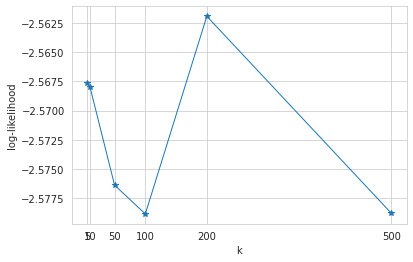

In [7]:
fix, ax = plt.subplots(1)
ax.plot(ks, -np.array(losses)/1000/np.log(2), marker="*", linewidth=1)
ax.set_xlabel("k")
ax.set_ylabel("log-likelihood")
plt.xticks(ks)
plt.show()

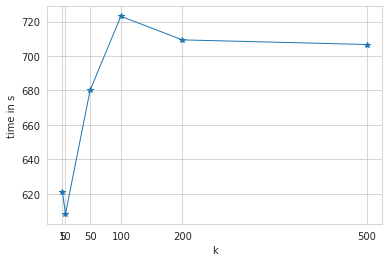

In [8]:
fix, ax = plt.subplots(1)
ax.plot(ks, times, marker="*", linewidth=1)
ax.set_xlabel("k")
ax.set_ylabel("time in s")
plt.xticks(ks)
plt.show()

In [9]:
np.save(f"./k-finder-results/loss-{random_seed}", losses)
np.save(f"./k-finder-results/times-{random_seed}", times)